**АНАЛИЗ ДАННЫХ ВАКАНСИЙ HH.ru**

**Цель проекта:** Выявить различия в предлагаемых вакансиях для Аналитиков данных и Системных аналитиков.

**Исходные данные:** Данные получены из API HH.ru

**Описание полей в данных:**
*   id - Уникальный идентификатор вакансии.
*   name - Название вакансии.
*   published_at - Дата публикации.
*   alternate_url - Ссылка на вакансию.
*   type - Статус вакансии на момент получения данных от api и передачи
их в базу.
*   employer - Работодатель.
*   department - Работодатель, отдел.
*   area - Регион места работы.
*   experience - Требуемый опыт работы.
*   key_skills - Ключевые навыки, в том числе найденные при анализе
полного текста вакансии. Поле генерируется после получения информации от api.
*   schedule - График работы.
*   employment - Тип занятости.
*   description - Описание вакансии.
*   description_lemmatized - Лемматизированное описание вакансии.т
*   salary_from - Нижняя граница предлагаемой заработной платы.
*   salary_to - Верхняя граница предлагаемой заработной платы.
*   salary_bin - Категория зарплаты.
*   key_skills_from_key_skills_field - Ключевые навыки из поля вакансии
key_skills.
*   hard_skills_from_description - “Твердые” навыки, найденные при
обработке полей c навыками. Поле генерируется после получения
информации от api.
*   soft_skills_from_description - “Мягкие” навыки, найденные при обработке полей c навыками. Поле генерируется после получения информации от api.


# **1.Общая информация о данных**

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import openpyxl
from collections import Counter
import numpy as np
warnings.filterwarnings("ignore")

In [2]:
#df_da = pd.read_excel(r'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/i/pE97G0qM1VD_DA') #https://disk.yandex.ru/i/pE97G0qM1VD_DA
#df_sa = pd.read_excel(r'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/i/9icRKKcfvWRJqQ') #https://disk.yandex.ru/i/9icRKKcfvWRJqQ

In [3]:
path_da = '/content/vacancies_da (1).xlsx'  # Путь к первому файлу
path_sa = '/content/vacancies_sa.xlsx'      # Путь ко второму файлу

# Прочитайте файлы
df_da = pd.read_excel(path_da, engine='openpyxl')
df_sa = pd.read_excel(path_sa, engine='openpyxl')

In [4]:
df_da.info()
df_da.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"['Анализ данных', 'Коммуникация', 'SQL', 'MS O...",Полный день,Полная занятость,задачи: разработка бизнес-моделей для группов...,задача разработка бизнес модель групповой прог...,NaN,NaN,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","Pandas, Юнит-экономика",Коммуникация
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"обязанности: участие в проектировании, разраб...",обязанность участие проектирование разработка ...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


In [5]:
df_da.describe()

,id,published_at,salary_from,salary_to
count,1.801000e+03,1801,348.000000,228.000000
mean,9.722646e+07,2024-05-04 07:51:09.441421312,109525.086207,153846.714912
min,7.799231e+07,2024-02-13 21:45:51,50.000000,25000.000000
25%,9.544812e+07,2024-04-11 06:46:59,70000.000000,85000.000000
50%,9.735636e+07,2024-05-11 21:45:07,90000.000000,120000.000000
75%,9.942526e+07,2024-05-29 13:39:52,137750.000000,200000.000000
max,1.017465e+08,2024-06-11 15:07:30,398000.000000,497500.000000
std,2.894522e+06,NaN,63011.338914,97255.738565


In [6]:
df_sa.info()
df_sa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1915 non-null   int64         
 1   name                              1915 non-null   object        
 2   published_at                      1915 non-null   datetime64[ns]
 3   alternate_url                     1915 non-null   object        
 4   type                              1915 non-null   object        
 5   employer                          1915 non-null   object        
 6   department                        361 non-null    object        
 7   area                              1915 non-null   object        
 8   experience                        1915 non-null   object        
 9   key_skills                        1915 non-null   object        
 10  schedule                          1915 non-null 

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",Удаленная работа,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],Полный день,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,NaN,ЗП не указана,NaN,NaN,Документация
3,100063260,Системный Аналитик ERP-решений,2024-07-09 10:51:54,https://hh.ru/vacancy/100063260,Открытая,Астор,NaN,Москва,Senior (6+ years),"['ERP', 'Atlassian Jira', '1С: Управление Прои...",Удаленная работа,Полная занятость,компания «астор» с 2000 года занимается разраб...,компания астор 2 год заниматься разработка вне...,NaN,NaN,ЗП не указана,"ERP, 1С: Управление Торговлей, Atlassian Jira,...",confluence,Коммуникация
4,100064793,Системный аналитик,2024-07-08 16:39:40,https://hh.ru/vacancy/100064793,Открытая,Зетта Страхование,NaN,Москва,Junior+ (1-3 years),"['JSON', 'SQL', 'XML', 'SOAP', 'HTML', 'JS', '...",Полный день,Полная занятость,обязанности: анализ задач развития и сопрово...,обязанность анализ задача развитие сопровожден...,NaN,NaN,ЗП не указана,"SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS",NaN,NaN


In [7]:
df_sa.describe()

,id,published_at,salary_from,salary_to
count,1.915000e+03,1915,356.000000,279.000000
mean,1.001074e+08,2024-07-04 19:50:42.855352576,154117.587079,223633.580645
min,5.241017e+07,2024-06-27 06:08:10,280.000000,20000.000000
25%,9.881442e+07,2024-07-01 17:17:51,85000.000000,145000.000000
50%,1.022884e+08,2024-07-05 08:58:44,150000.000000,220000.000000
75%,1.031315e+08,2024-07-08 10:22:25,200000.000000,300000.000000
max,1.035847e+08,2024-07-09 12:47:11,350000.000000,580000.000000
std,5.214258e+06,NaN,74335.125628,103654.639332


In [8]:
print('Количество пропусков в df_da:')
print(df_da.isna().sum().sort_values())
print( )
print('Количество пропусков в df_sa:')
print(df_sa.isna().sum().sort_values())

Количество пропусков в df_da:
id                                     0
salary_bin                             0
description_lemmatized                 0
description                            0
employment                             0
schedule                               0
experience                             0
key_skills                             0
employer                               0
type                                   0
alternate_url                          0
published_at                           0
name                                   0
area                                   0
key_skills_from_key_skills_field     708
soft_skills_from_description        1213
department                          1280
hard_skills_from_description        1383
salary_from                         1453
salary_to                           1573
dtype: int64

Количество пропусков в df_sa:
id                                     0
salary_bin                             0
description_lemmatized  

In [9]:
def pass_value_barh(dfg):
    try:
        (
            (dfg.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False)
            .set_title('% пропусков', color = 'SteelBlue')
        );
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

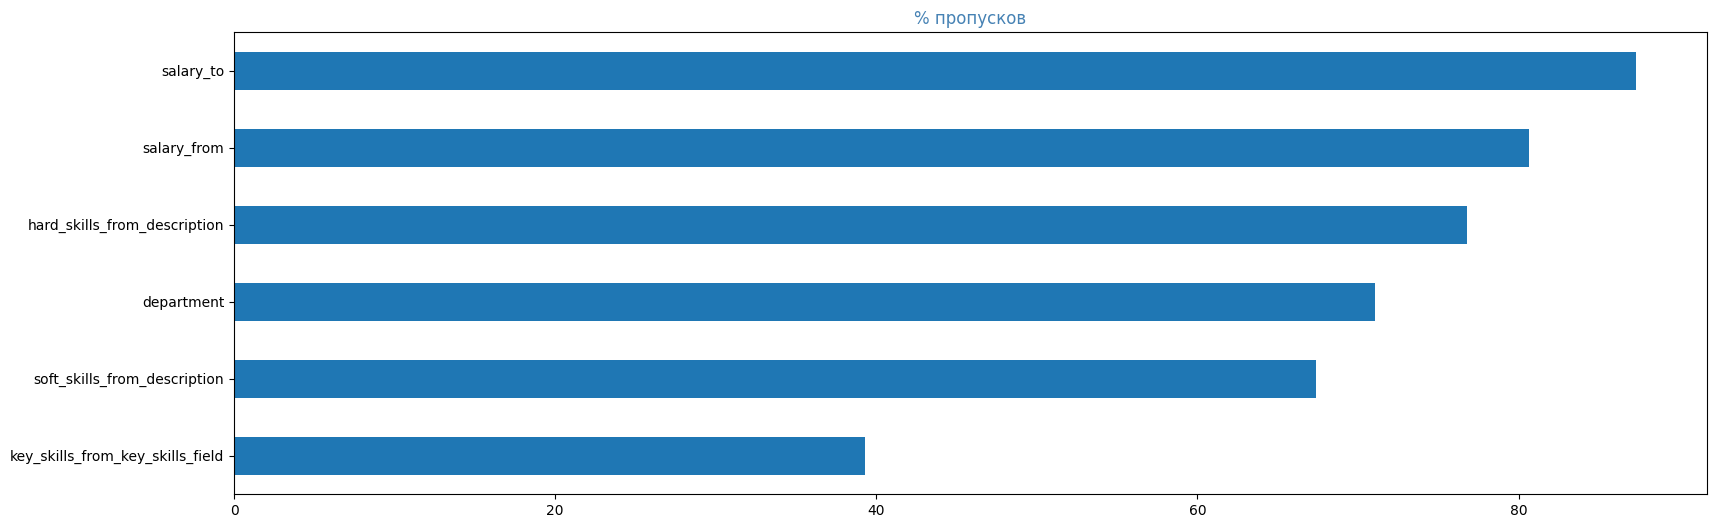

In [10]:
pass_value_barh(df_da)

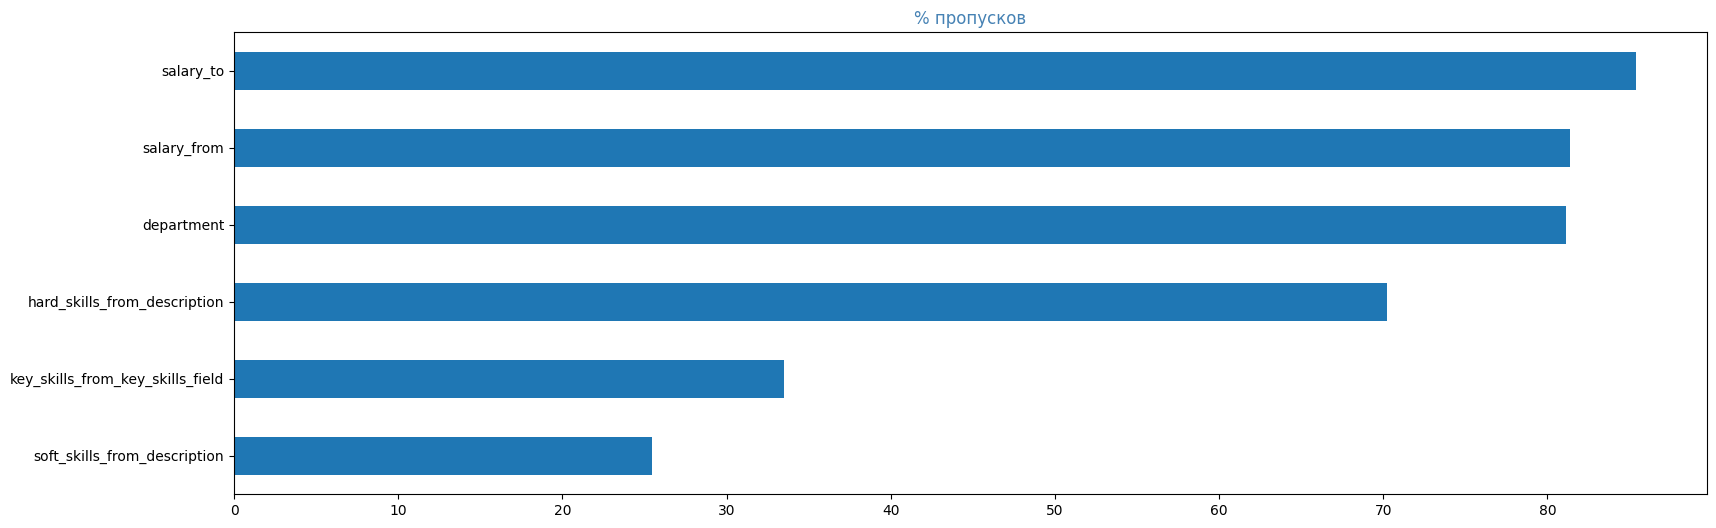

In [11]:
pass_value_barh(df_sa)

**Промежуточный вывод по разделу 1:**

Данные предоставлены в виде двух таблиц: информация по аналитикам данных и информация по системным аналитикам. Вакансий аналитиков данных представлено 1801 в промежутке времени с 13.02.2024 по 11.06.2024, а вакансий системных аналитиков - 1915 в промежутке времени с 27.06.2024 по 09.07.2024. Наименования столбцов в таблицах совпадают. Типы данных соответствуют содержимому. В обоих таблицах присутствуют пропуски в одних и тех же столбцах, но в разном количестве: key_skills_from_key_skills_field, soft_skills_from_description, hard_skills_from_description, department, salary_from, salary_to.
Следует обратить внимание на минимальные значения salary_from по анализируемым вакансиям. Для облегчения анализ данных следует объединить данные в одну таблицу.

# **2. Предобработка данных**

Перед тем как объединить данные посмотрим на минимальные значения по столбцу salary_from.

In [12]:
df_da.query('salary_from < 20000')

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
1110,96943446,Аналитик данных в отдел развития на маркетплейсах,2024-05-11 21:45:07,https://hh.ru/vacancy/96943446,Открытая,Репетуев Иван Дмитриевич,NaN,Москва,Junior (no experince),"['Аналитическое мышление', 'Аналитика продаж',...",Удаленная работа,Полная занятость,ищу в команду аналитика до глубины мозга косте...,искать команда аналитик глубина мозг кость име...,50.0,100001.0,От 100 тысяч до 200 тысяч,"Аналитика продаж, Конкурентная аналитика, Анал...",NaN,NaN


Скорее всего здесь опечатка, так как при уровне заработной платы от 100 тыс до 200 тыс минимальный размер оплаты труда не может быть 50. Исправим данные.

In [13]:
df_da.loc[df_da['salary_from'] == 50 , 'salary_from'] = 50000

In [14]:
df_da.query('id == 96943446')

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
1110,96943446,Аналитик данных в отдел развития на маркетплейсах,2024-05-11 21:45:07,https://hh.ru/vacancy/96943446,Открытая,Репетуев Иван Дмитриевич,NaN,Москва,Junior (no experince),"['Аналитическое мышление', 'Аналитика продаж',...",Удаленная работа,Полная занятость,ищу в команду аналитика до глубины мозга косте...,искать команда аналитик глубина мозг кость име...,50000.0,100001.0,От 100 тысяч до 200 тысяч,"Аналитика продаж, Конкурентная аналитика, Анал...",NaN,NaN


In [15]:
df_sa.query('salary_from < 20000')

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
1470,91944373,Системный Аналитик Middle/Senior,2024-07-06 15:14:38,https://hh.ru/vacancy/91944373,Открытая,Datanomica,NaN,Москва,Senior (6+ years),"['JSON API', 'JSON', 'XML', 'SQL', 'Юнит-эконо...",Удаленная работа,Полная занятость,"привет! мы — ооо «датаномика», решаем проблемы...",привет датаномика решать проблема структуриров...,280.0,340000.0,Больше 300 тысяч,"JSON API, XML, JSON, Agile, Java, SQL, Kafka","confluence, Юнит-экономика",NaN


Здесь тоже скорее всего опечатка. При уровне заработной платы больше 300 тыс минимальный размер оплаты труда не может быть 280. Исправим данные.

In [16]:
df_sa.loc[df_sa['salary_from'] == 280 , 'salary_from'] = 280000

In [17]:
df_sa.query('id == 91944373')

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
1470,91944373,Системный Аналитик Middle/Senior,2024-07-06 15:14:38,https://hh.ru/vacancy/91944373,Открытая,Datanomica,NaN,Москва,Senior (6+ years),"['JSON API', 'JSON', 'XML', 'SQL', 'Юнит-эконо...",Удаленная работа,Полная занятость,"привет! мы — ооо «датаномика», решаем проблемы...",привет датаномика решать проблема структуриров...,280000.0,340000.0,Больше 300 тысяч,"JSON API, XML, JSON, Agile, Java, SQL, Kafka","confluence, Юнит-экономика",NaN


In [18]:
df_da.describe()

,id,published_at,salary_from,salary_to
count,1.801000e+03,1801,348.000000,228.000000
mean,9.722646e+07,2024-05-04 07:51:09.441421312,109668.620690,153846.714912
min,7.799231e+07,2024-02-13 21:45:51,25000.000000,25000.000000
25%,9.544812e+07,2024-04-11 06:46:59,70000.000000,85000.000000
50%,9.735636e+07,2024-05-11 21:45:07,90000.000000,120000.000000
75%,9.942526e+07,2024-05-29 13:39:52,137750.000000,200000.000000
max,1.017465e+08,2024-06-11 15:07:30,398000.000000,497500.000000
std,2.894522e+06,NaN,62817.839122,97255.738565


In [19]:
df_sa.describe()

,id,published_at,salary_from,salary_to
count,1.915000e+03,1915,356.000000,279.000000
mean,1.001074e+08,2024-07-04 19:50:42.855352576,154903.317416,223633.580645
min,5.241017e+07,2024-06-27 06:08:10,20000.000000,20000.000000
25%,9.881442e+07,2024-07-01 17:17:51,85000.000000,145000.000000
50%,1.022884e+08,2024-07-05 08:58:44,150000.000000,220000.000000
75%,1.031315e+08,2024-07-08 10:22:25,200000.000000,300000.000000
max,1.035847e+08,2024-07-09 12:47:11,350000.000000,580000.000000
std,5.214258e+06,NaN,74182.644120,103654.639332


Теперь минимальные значение похожи на реальность.

Посмотрим на количество явных дубликатов:

In [20]:
df_da.duplicated().sum()

0

In [21]:
df_sa.duplicated().sum()

0

Явных дубликатов нет. Посмотрим на количество дубликатов по id и alternate_url.

In [22]:
print('Количество дубликатов в DA по полю id:')
print(df_da.duplicated(subset='id').sum())
print()
print('Количество дубликатов в DA по полю alternate_url:')
print(df_da.duplicated(subset='alternate_url').sum())

Количество дубликатов в DA по полю id:
0

Количество дубликатов в DA по полю alternate_url:
0


In [23]:
print('Количество дубликатов в SA по полю id:')
print(df_sa.duplicated(subset='id').sum())
print()
print('Количество дубликатов в SA по полю alternate_url:')
print(df_sa.duplicated(subset='alternate_url').sum())

Количество дубликатов в SA по полю id:
0

Количество дубликатов в SA по полю alternate_url:
0


Искать дубликаты в наименовании организации бесполезно, на HH все организации зарегистрированы в единственном экземпляре.

Для облегчения дальнейшего анализа объединим таблицы и создадим дополнительный столбец с меткой принадлежности к вакансии

In [24]:
df_da['vac_type'] = 'Аналитик данных'
df_sa['vac_type'] = 'Системный аналитик'
df = pd.concat([df_da, df_sa], ignore_index=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3716 entries, 0 to 3715
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3716 non-null   int64         
 1   name                              3716 non-null   object        
 2   published_at                      3716 non-null   datetime64[ns]
 3   alternate_url                     3716 non-null   object        
 4   type                              3716 non-null   object        
 5   employer                          3716 non-null   object        
 6   department                        882 non-null    object        
 7   area                              3716 non-null   object        
 8   experience                        3716 non-null   object        
 9   key_skills                        3716 non-null   object        
 10  schedule                          3716 non-null 

Посмотрим на уникальные наименования по некоторым столбцам:

In [25]:
set(df['type'].sort_values().unique())

{'Открытая'}

In [26]:
set(df['area'].sort_values().unique())

{'Абакан',
 'Адлер',
 'Адыгейск',
 'Алтайское',
 'Апатиты',
 'Артем',
 'Астрахань',
 'Байбек',
 'Балашиха',
 'Барнаул',
 'Белгород',
 'Белорецк',
 'Брянск',
 'Вейделевка',
 'Великие Луки',
 'Вельск',
 'Верхняя Пышма',
 'Владивосток',
 'Владимир',
 'Волгоград',
 'Вологда',
 'Воронеж',
 'Геленджик',
 'Горно-Алтайск',
 'Дзержинск (Нижегородская область)',
 'Дзержинский',
 'Дмитров',
 'Дубна',
 'Екатеринбург',
 'Златоуст',
 'Иваново (Ивановская область)',
 'Ижевск',
 'Иннополис',
 'Иркутск',
 'Йошкар-Ола',
 'Казань',
 'Калининград',
 'Калуга',
 'Кемерово',
 'Киров (Кировская область)',
 'Кольчугино',
 'Королев',
 'Кострома',
 'Красногорск',
 'Краснодар',
 'Красноярск',
 'Курган',
 'Курск',
 'Липецк',
 'Луховицы',
 'Магнитогорск',
 'Майкоп',
 'Москва',
 'Муром',
 'Мытищи',
 'Набережные Челны',
 'Нефтекамск',
 'Нижний Новгород',
 'Новокузнецк',
 'Новосибирск',
 'Новочеркасск',
 'Одинцово',
 'Омск',
 'Орел',
 'Оренбург',
 'Пенза',
 'Пермь',
 'Петрозаводск',
 'Подольск (Московская область)',
 

In [27]:
set(df['experience'].sort_values().unique())

{'Junior (no experince)',
 'Junior+ (1-3 years)',
 'Middle (3-6 years)',
 'Senior (6+ years)'}

In [28]:
set(df['schedule'].sort_values().unique())

{'Гибкий график', 'Полный день', 'Сменный график', 'Удаленная работа'}

In [29]:
set(df['employment'].sort_values().unique())

{'Полная занятость', 'Проектная работа', 'Стажировка', 'Частичная занятость'}

In [30]:
set(df['hard_skills_from_description'].sort_values().unique())

{'Google Sheets',
 'Pandas',
 'Pandas, Google Sheets',
 'Pandas, confluence',
 'Pandas, Юнит-экономика',
 'confluence',
 'confluence, Юнит-экономика',
 nan,
 'Математическая статистика',
 'Юнит-экономика'}

In [31]:
set(df['soft_skills_from_description'].sort_values().unique())

{nan,
 'Адаптивность',
 'Аналитическое мышление',
 'Документация',
 'Документация, Аналитическое мышление',
 'Документация, Креативность',
 'Документация, Креативность, Аналитическое мышление',
 'Документация, Переговоры',
 'Документация, Переговоры, Аналитическое мышление',
 'Документация, Проактивность',
 'Документация, Проактивность, Аналитическое мышление',
 'Документация, Проактивность, Креативность',
 'Документация, Проактивность, Переговоры',
 'Документация, Эмпатия, Аналитическое мышление',
 'Коммуникация',
 'Коммуникация, Адаптивность',
 'Коммуникация, Аналитическое мышление',
 'Коммуникация, Документация',
 'Коммуникация, Документация, Аналитическое мышление',
 'Коммуникация, Документация, Креативность',
 'Коммуникация, Документация, Переговоры',
 'Коммуникация, Документация, Презентация результатов',
 'Коммуникация, Документация, Проактивность',
 'Коммуникация, Документация, Проактивность, Аналитическое мышление',
 'Коммуникация, Документация, Проактивность, Переговоры',
 'К

Пропущенных значений по заработной плате больше всего. Заполним salary_from по данным из salary_to.

In [32]:
df['salary_from'].fillna(df['salary_to'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3716 entries, 0 to 3715
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3716 non-null   int64         
 1   name                              3716 non-null   object        
 2   published_at                      3716 non-null   datetime64[ns]
 3   alternate_url                     3716 non-null   object        
 4   type                              3716 non-null   object        
 5   employer                          3716 non-null   object        
 6   department                        882 non-null    object        
 7   area                              3716 non-null   object        
 8   experience                        3716 non-null   object        
 9   key_skills                        3716 non-null   object        
 10  schedule                          3716 non-null 

Количество непустых строк salary_from увеличилось с 704 до 858. Организации неохотно указывают заработные платы в открытую.

**Промежуточный вывод по разделу 2:**

В результате предобработки данных:
1. Были исправлены опечатки минимальных значений в salary_from.
2. Явных и неявных дубликатов не обнаружено.
3. Частично заполнены пропуски в salary_from. Количество непустых строк увеличилось с 704 до 858.
4. Пропуски в столбцах key_skills_from_key_skills_field, soft_skills_from_description, hard_skills_from_description оставлены без заполнения. Данные в эти столбцы переносятся из столбца key_skills.
5. Пропуски в столбце department оставлены без изменения, т.к. они не имеют ценности для анализа.

# **3. Исследовательский анализ данных**

## **3.1. Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом.**

In [33]:
#добавим столбец с наименованием грейда
df['grade'] = df['experience'].replace({'Junior (no experince)': 'Junior',
                                        'Junior+ (1-3 years)': 'Junior+',
                                        'Middle (3-6 years)': 'Middle',
                                        'Senior (6+ years)': 'Senior'})

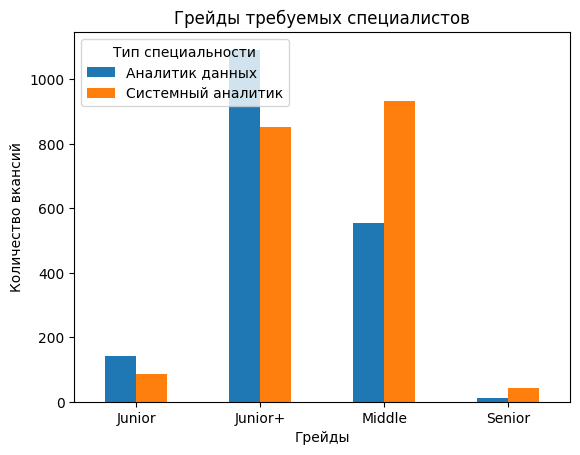

In [34]:
grades = df.pivot_table(index='grade', columns= 'vac_type', values='id', aggfunc='count')
grades.plot(y=["Аналитик данных", "Системный аналитик"], kind='bar')
plt.ylabel('Количество вкансий')
plt.xlabel('Грейды')
plt.xticks(rotation=0)
plt.title('Грейды требуемых специалистов')
plt.legend(title='Тип специальности', loc=2)
plt.show()

**Промежуточный вывод по подразделу 3.1.:**

Больше всего востребованы Junior+ Аналитики данных и Middle Системные администраторы. Менее востребоаны Senior Аналитиков данных и Системных аналитиков.

## **3.2. Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системный аналитик.**

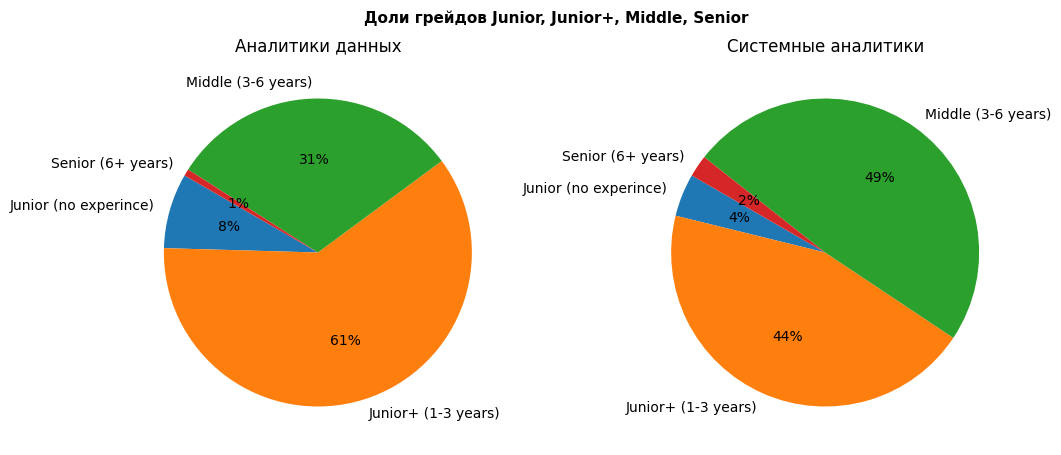

In [35]:
vac_da = df.loc[df['vac_type']== 'Аналитик данных']['experience'].value_counts().sort_index()
vac_sa = df.loc[df['vac_type']== 'Системный аналитик']['experience'].value_counts().sort_index()

#сформируем поле для диаграммы
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#создадим круговую диаграмму по вакансиям для бизнес аналитиков
#colors = ['#5FC0CE', '#FF7D73', '#FFD373', '#94337F', '#8B6ED7']
ax[0].pie(vac_da, labels= [lbl for lbl, value in vac_da.items()], startangle=150,autopct='%1.f%%')
ax[0].set_title('Аналитики данных')

#создадим круговую диаграмму по вакансиям для аналитиков данных
ax[1].pie(vac_sa,labels= [lbl for lbl, value in vac_sa.items()],startangle=150,autopct='%1.f%%')
ax[1].set_title('Системные аналитики')

plt.suptitle('Доли грейдов Junior, Junior+, Middle, Senior', fontsize=11, fontweight='bold')
plt.show()

**ПРомежуточный вывод по подразделу 3.2.:**

Самую большую долю грейдов у Аналитиков данных 61% занимает Junior+, далее 31% - Middle, Junior - 8%, а на долю Senior приходится 1%. У Системных аналитиков львиную долю занимают Viddle - 49%, немного уступают Junior+ -44%, Junior - 4%, а Senior -2%.

## **3.3. Определение типичного места работы для Аналитика данных и Системного аналитика по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы (отдельно для грейдов Junior, Junior+, Middle, Senior).**

In [36]:
#напишем функцию для построения графиков
def visualize(vac_type: str, grade: str):
    plot_info = {
        'Аналитик данных': 'Аналитик данных',
        'Системный аналитик': 'Системный аналитик',
        'employer': {
            'title': 'Топ работодателей',
            'ylabel': 'Работодатель',
            'xlabel': 'Количество вакансий',
        },
        'salary_from': {
            'title': 'Распределение по зарплате',
            'ylabel': 'Количество вакансий',
            'xlabel': 'Зарплата',
        },
        'employment': {
            'title': 'Распределение по типу занятости',
            'ylabel': 'Тип занятости',
            'xlabel': 'Количество вакансий',
        },
        'schedule': {
            'title': 'Распределение по графику работы',
            'ylabel': 'График работы',
            'xlabel': 'Количество вакансий',
        },
    }

    # Фильтрация данных по типу вакансии и уровню специалиста
    filtered_data = df[(df['vac_type'] == vac_type) & (df['grade'] == grade)]

    # Создание фигуры с несколькими subplots
    fig, axes = plt.subplots(4, 1, figsize=(10, 15))
    fig.suptitle(f'Типичное место работы для: {grade} {plot_info[vac_type]}', y=1.02, fontsize=14)

    # Построение графиков для каждого столбца
    for i, column in enumerate(['employer', 'salary_from', 'employment', 'schedule']):
        ax = axes[i]

        if column == 'salary_from':
            filtered_data[column].hist(ax=ax, bins=20, color='green', edgecolor='black')
            ax.set_title(plot_info[column]['title'], fontsize=12)
            ax.set_ylabel(plot_info[column]['ylabel'], fontsize=10)
            ax.set_xlabel(plot_info[column]['xlabel'], fontsize=10, labelpad=10)
        else:
            pivot_table = filtered_data.pivot_table(index=column, values='area', aggfunc='count')
            pivot_table.sort_values(by='area').tail(5).plot(kind='barh', ax=ax, color='green', legend=False)
            ax.set_title(plot_info[column]['title'], fontsize=12)
            ax.set_ylabel(plot_info[column]['ylabel'], fontsize=10)
            ax.set_xlabel(plot_info[column]['xlabel'], fontsize=10, labelpad=10)

    plt.subplots_adjust(hspace=0.5, top=0.9)
    plt.show()

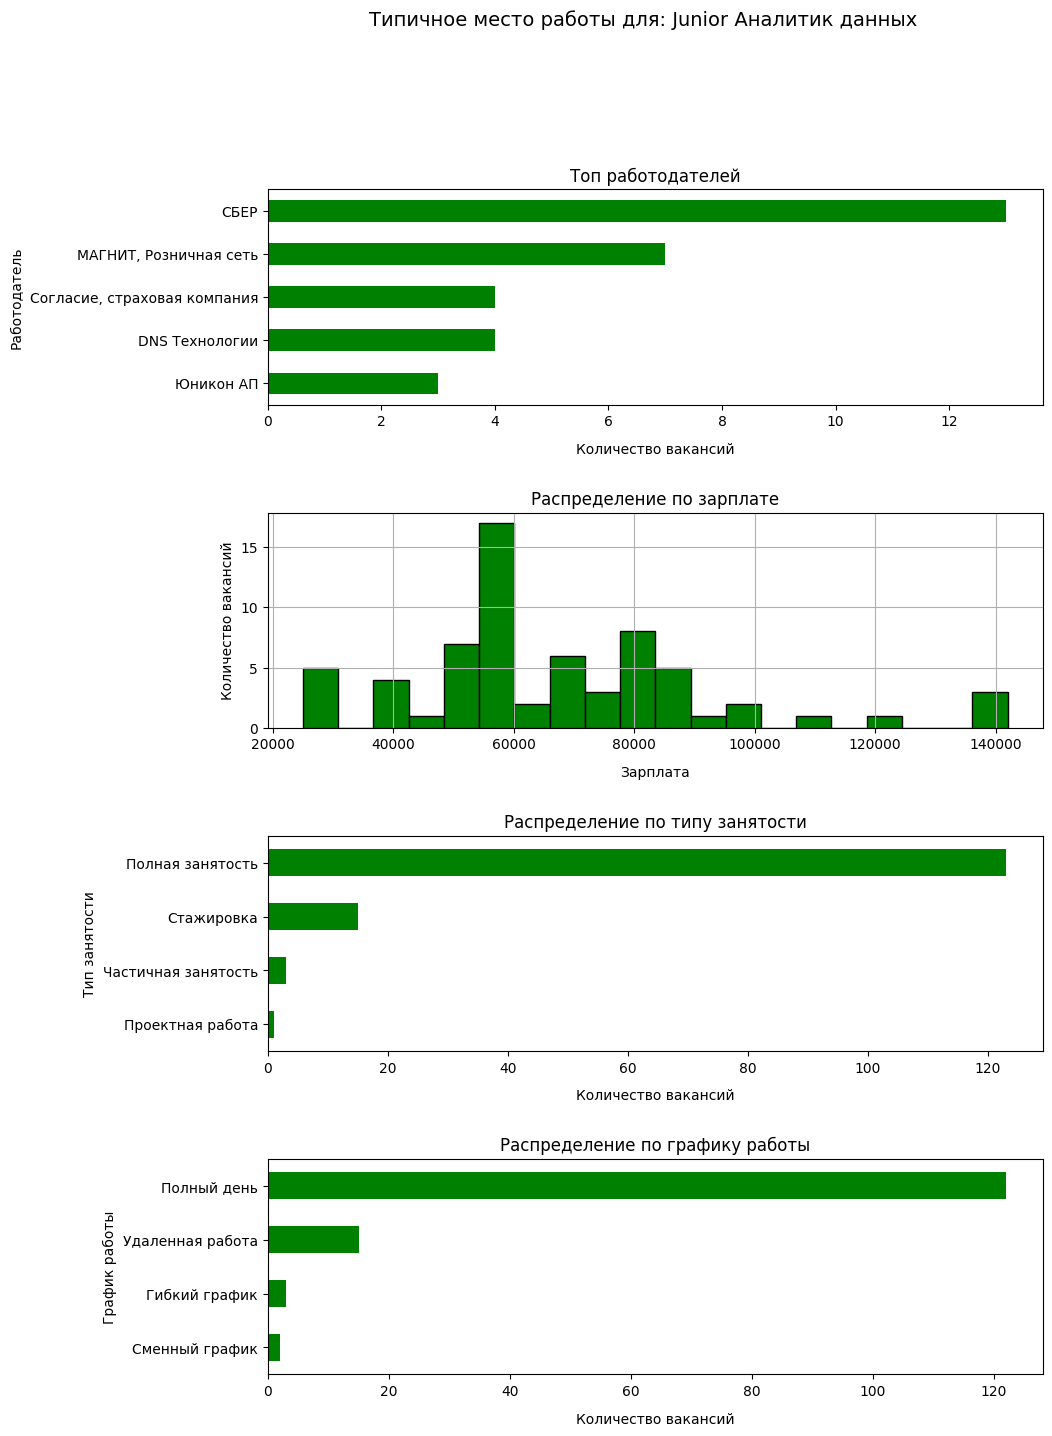

In [37]:
visualize('Аналитик данных', 'Junior')

**Типичное место работы для Junior Аналитика данных:**
1. Место работы - СБЕР.
2. Заработная плата - 55-60тыс.
3. Полна занаятость.
4. Полный рабочий день

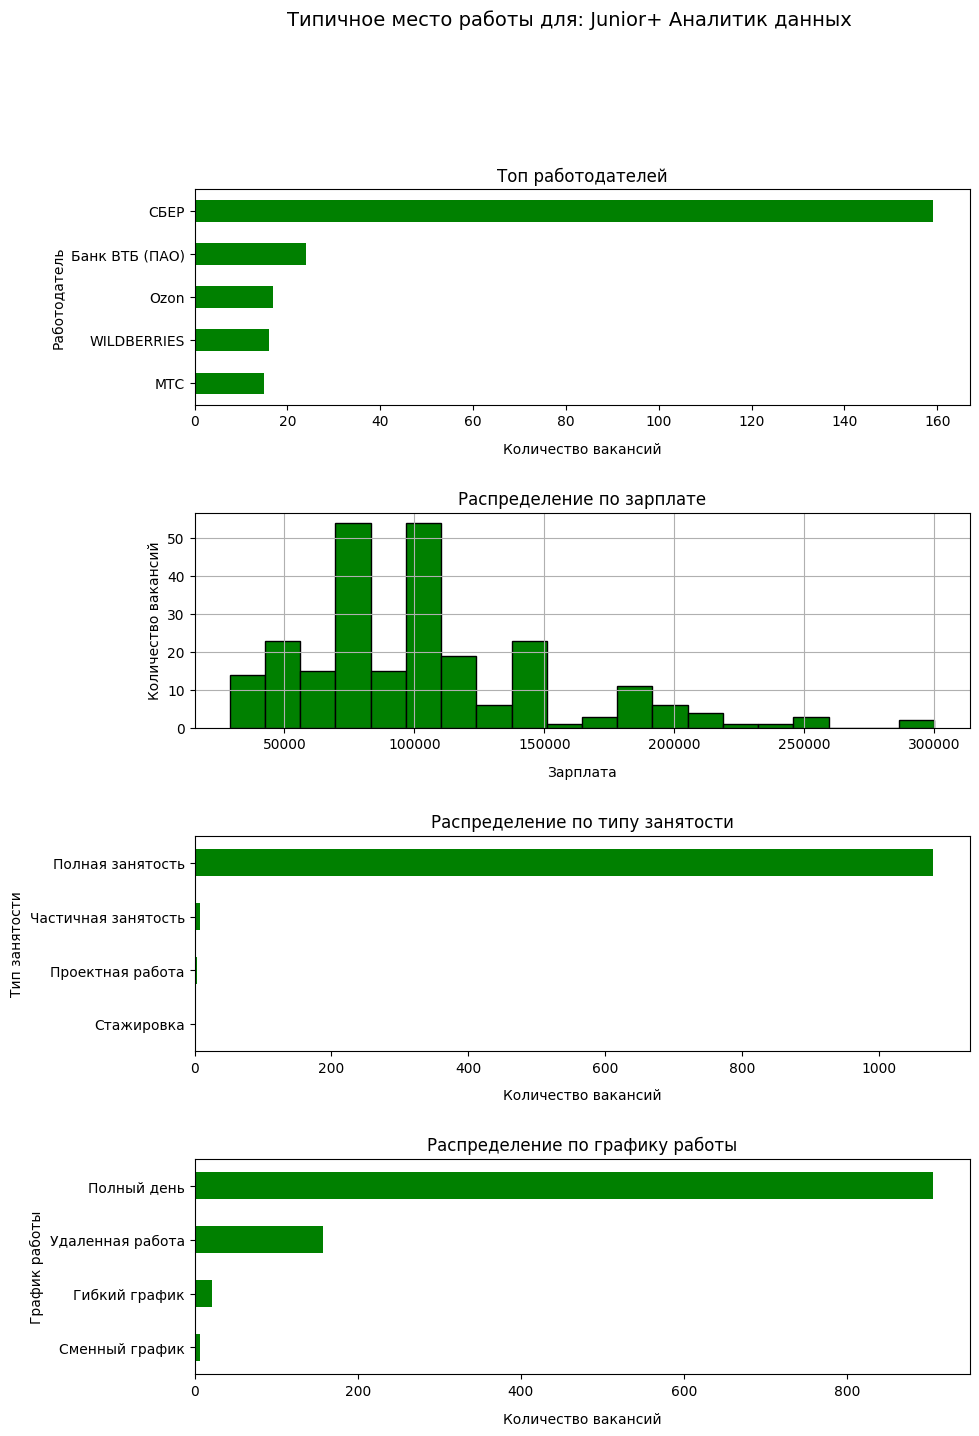

In [38]:
visualize('Аналитик данных', 'Junior+')

**Типичное место работы для Junior+ Аналитика данных:**
1. Место работы - СБЕР.
2. Заработная плата - 60-110тыс.
3. Полная занаятость.
4. Полный рабочий день.

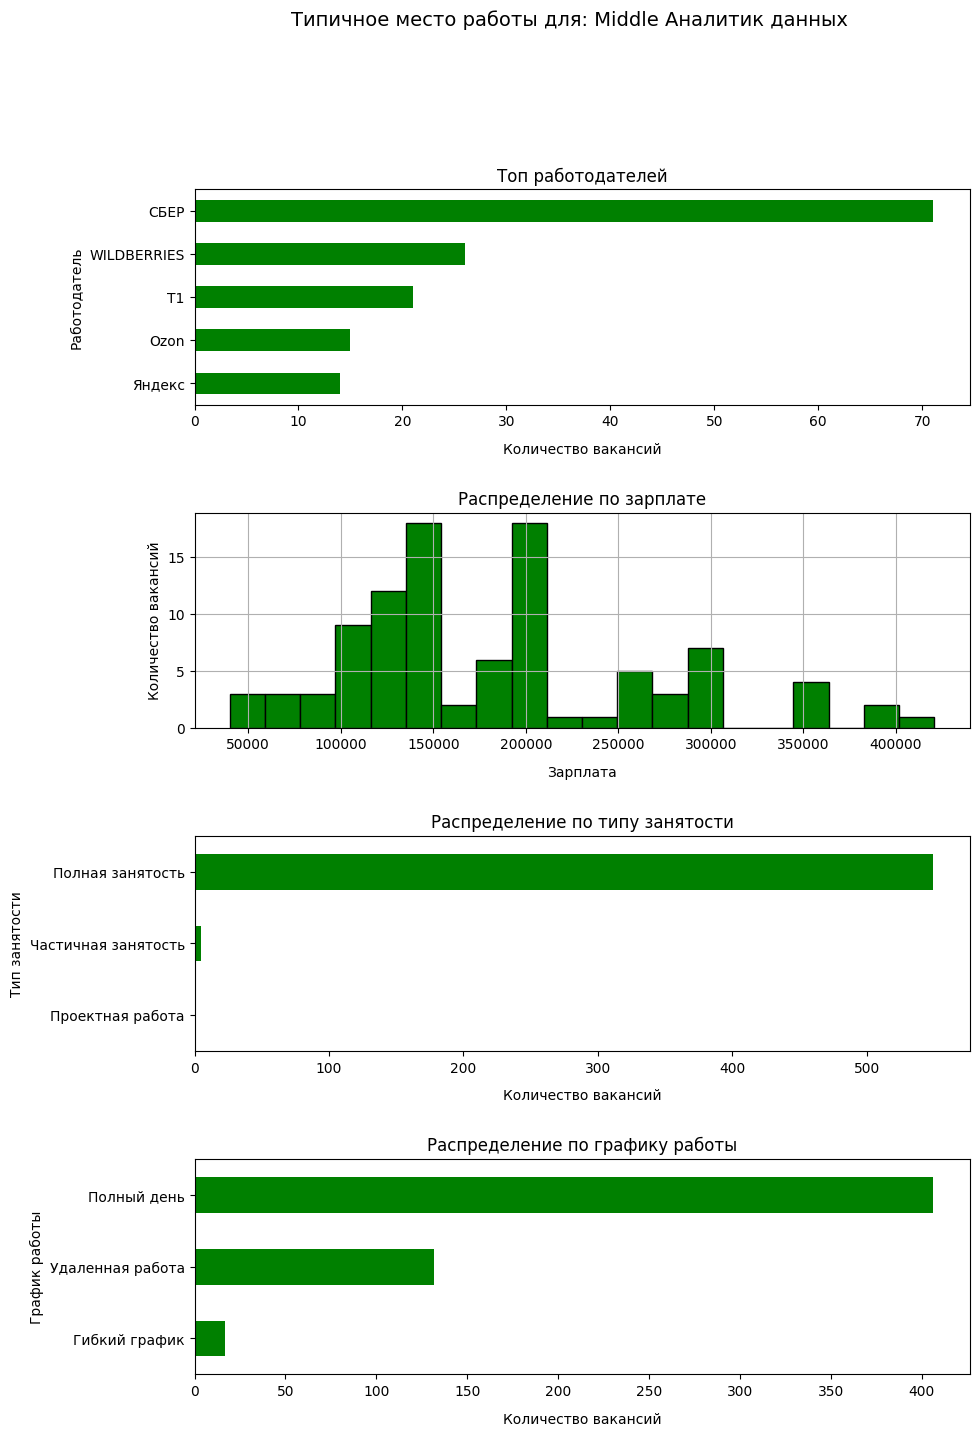

In [39]:
visualize('Аналитик данных', 'Middle')

**Типичное место работы для Middle Аналитика данных:**
1. Место работы - СБЕР.
2. Заработная плата - 110-200тыс.
3. Полная занаятость.
4. Полный рабочий день.

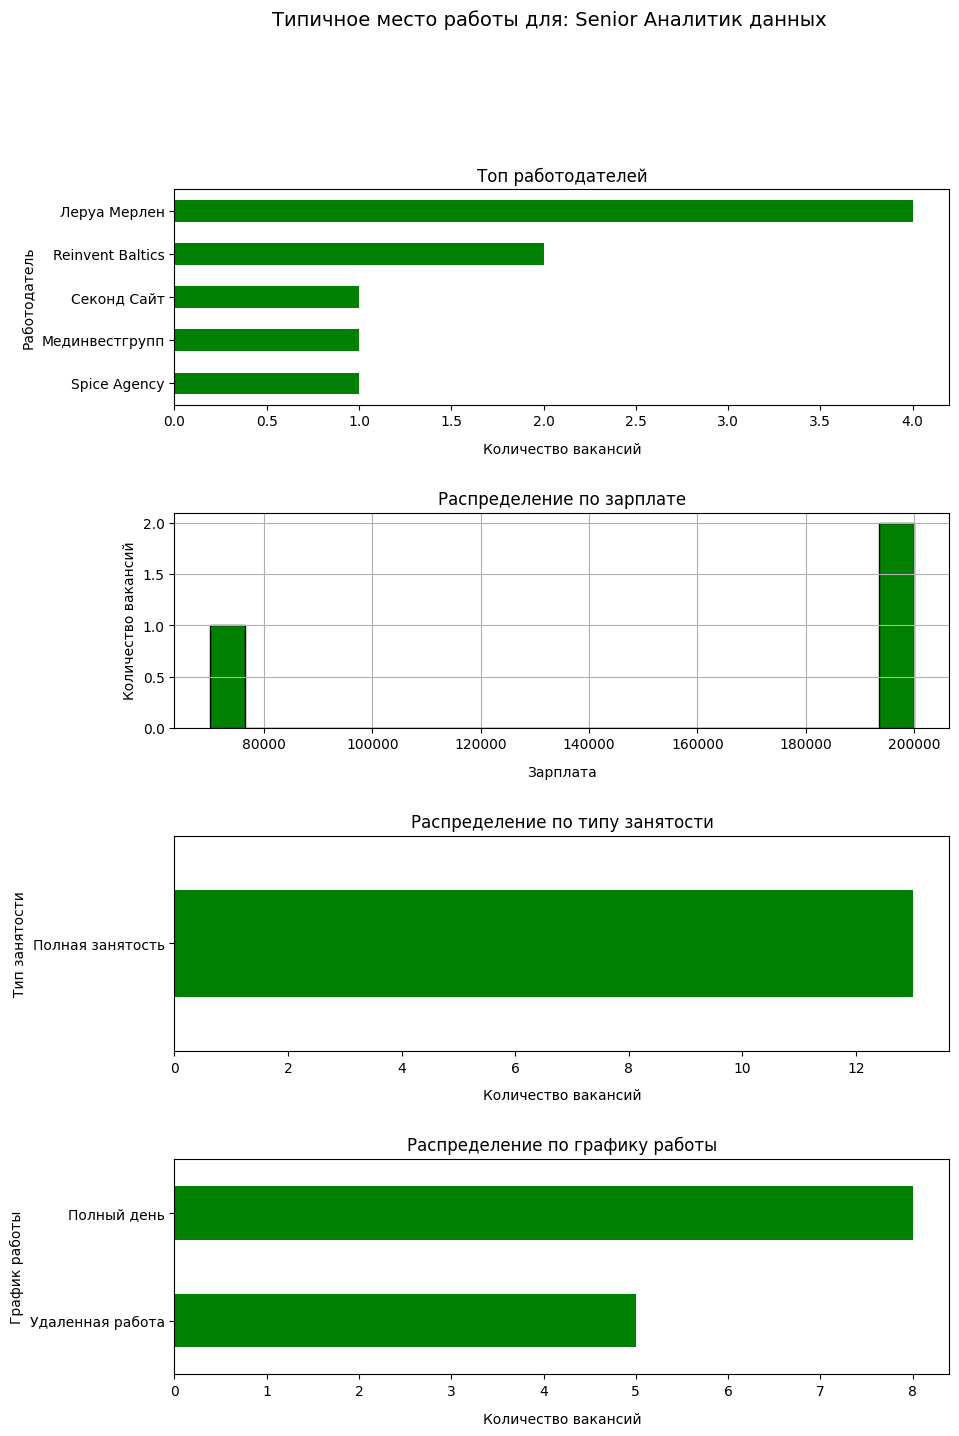

In [40]:
visualize('Аналитик данных', 'Senior')

**Типичное место работы для Senior Аналитика данных:**
1. Место работы - Леруа Мерлен.
2. Заработная плата - 180-200тыс.
3. Полная занаятость.
4. Полный рабочий день.

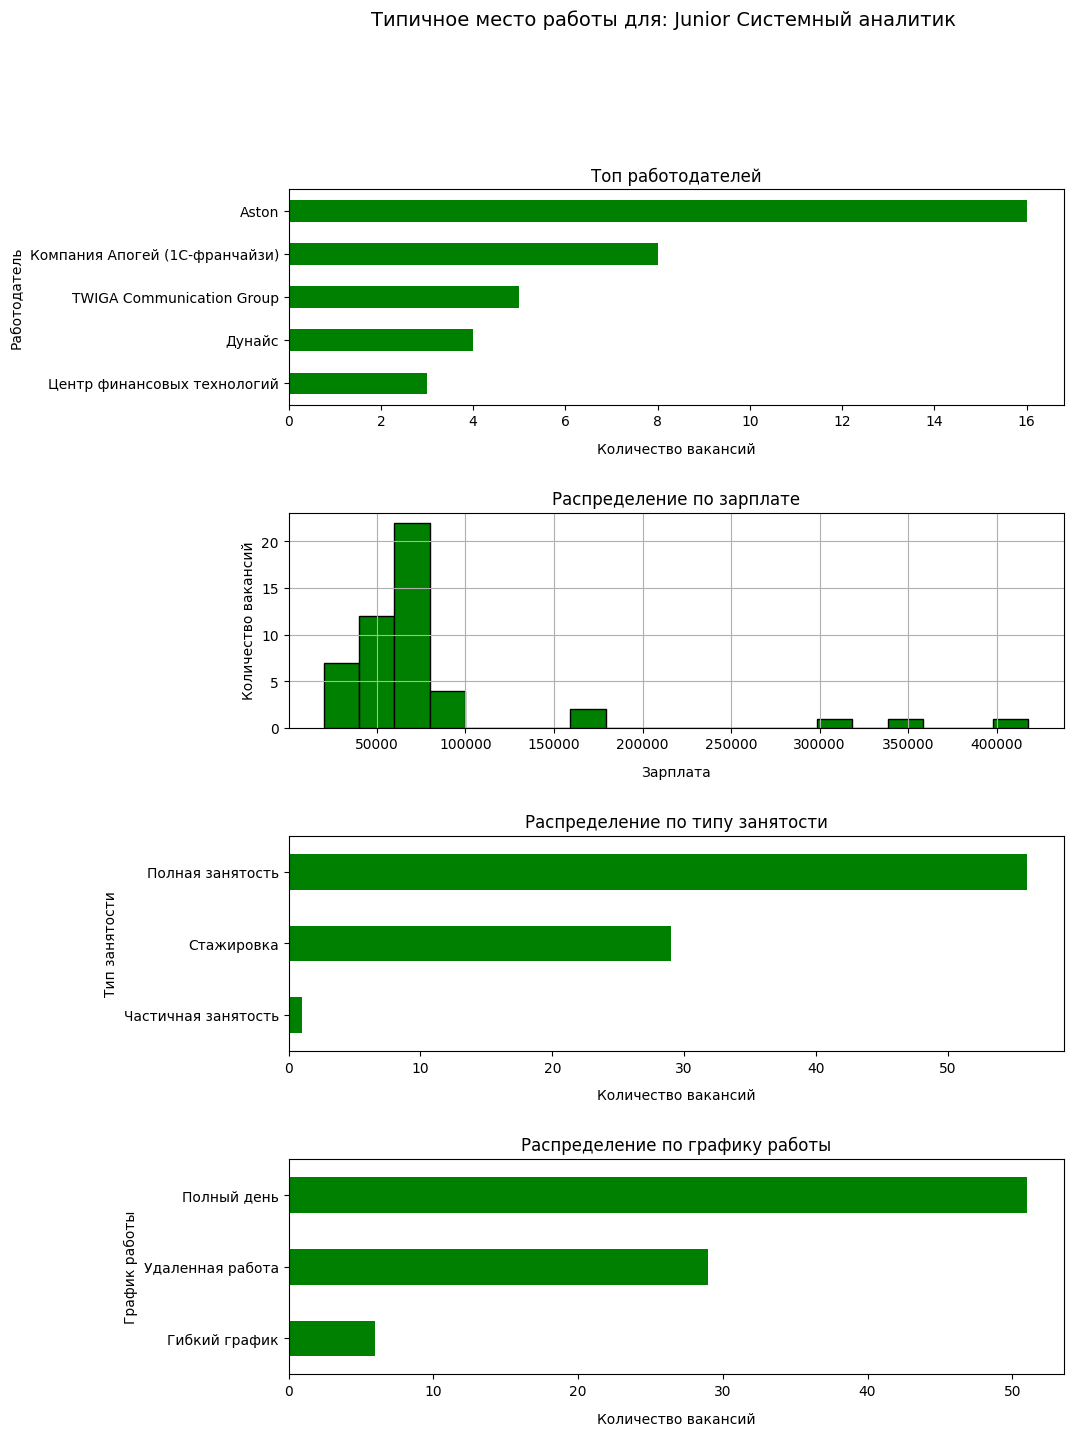

In [41]:
visualize('Системный аналитик', 'Junior')

**Типичное место работы для Junior Системный аналитик:**
1. Место работы - Aston.
2. Заработная плата - 55-70тыс.
3. Полная занаятость.
4. Полный рабочий день.

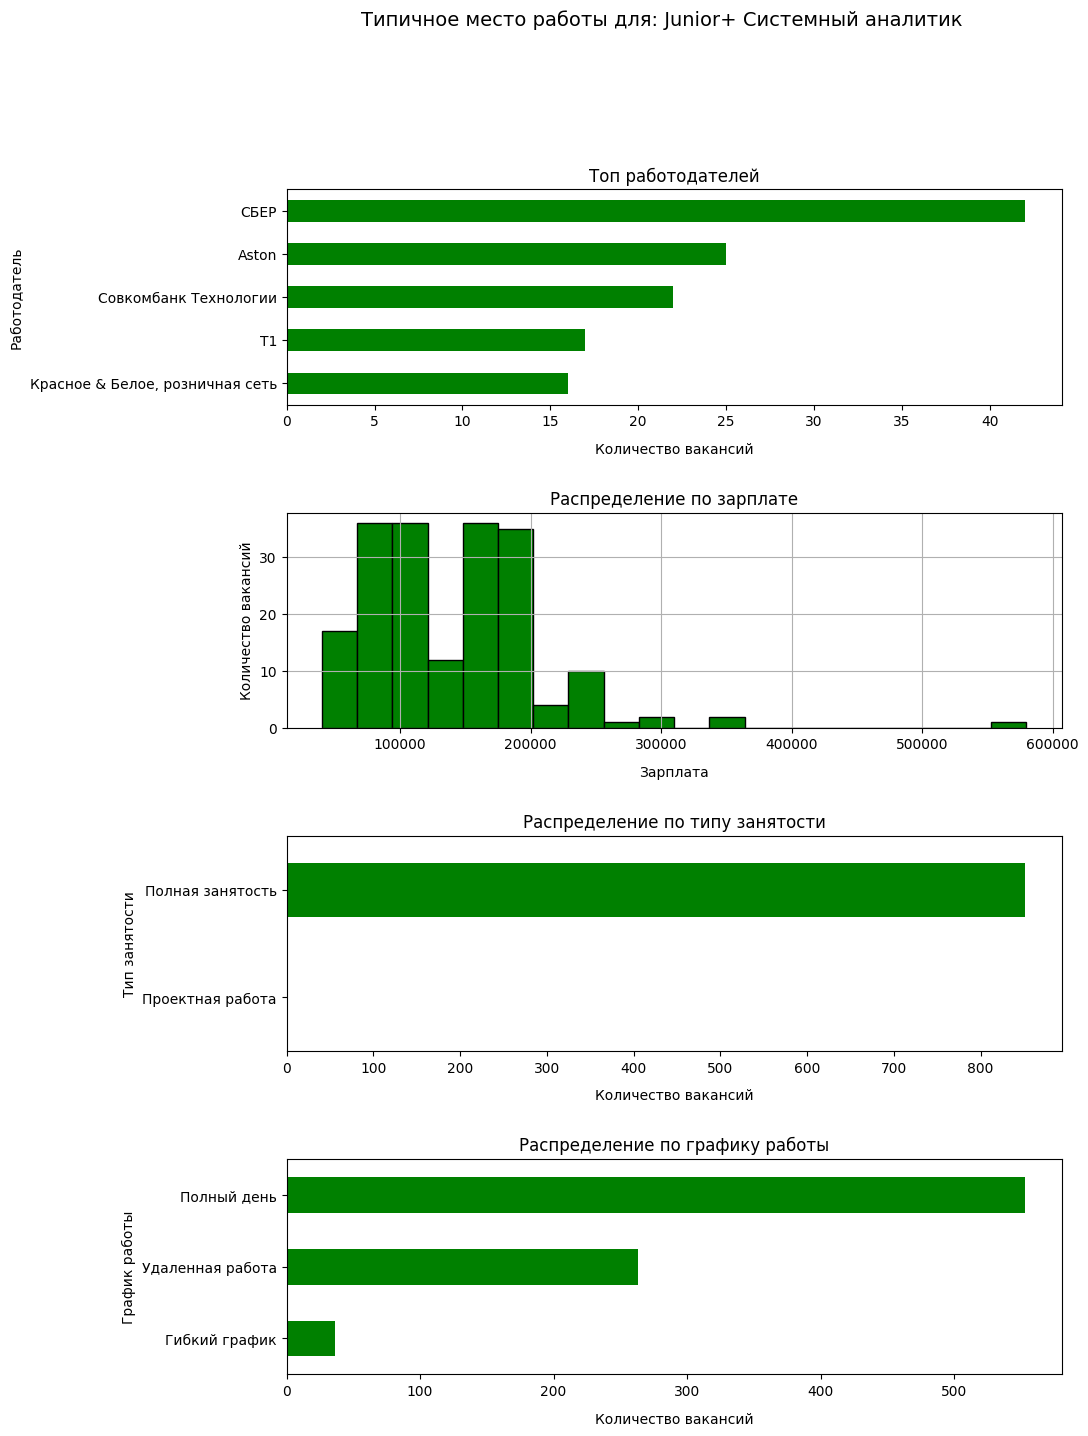

In [42]:
visualize('Системный аналитик', 'Junior+')

**Типичное место работы для Junior+ Системный аналитик:**
1. Место работы - СБЕР.
2. Заработная плата - 70-200 тыс.
3. Полная занаятость.
4. Полный рабочий день.

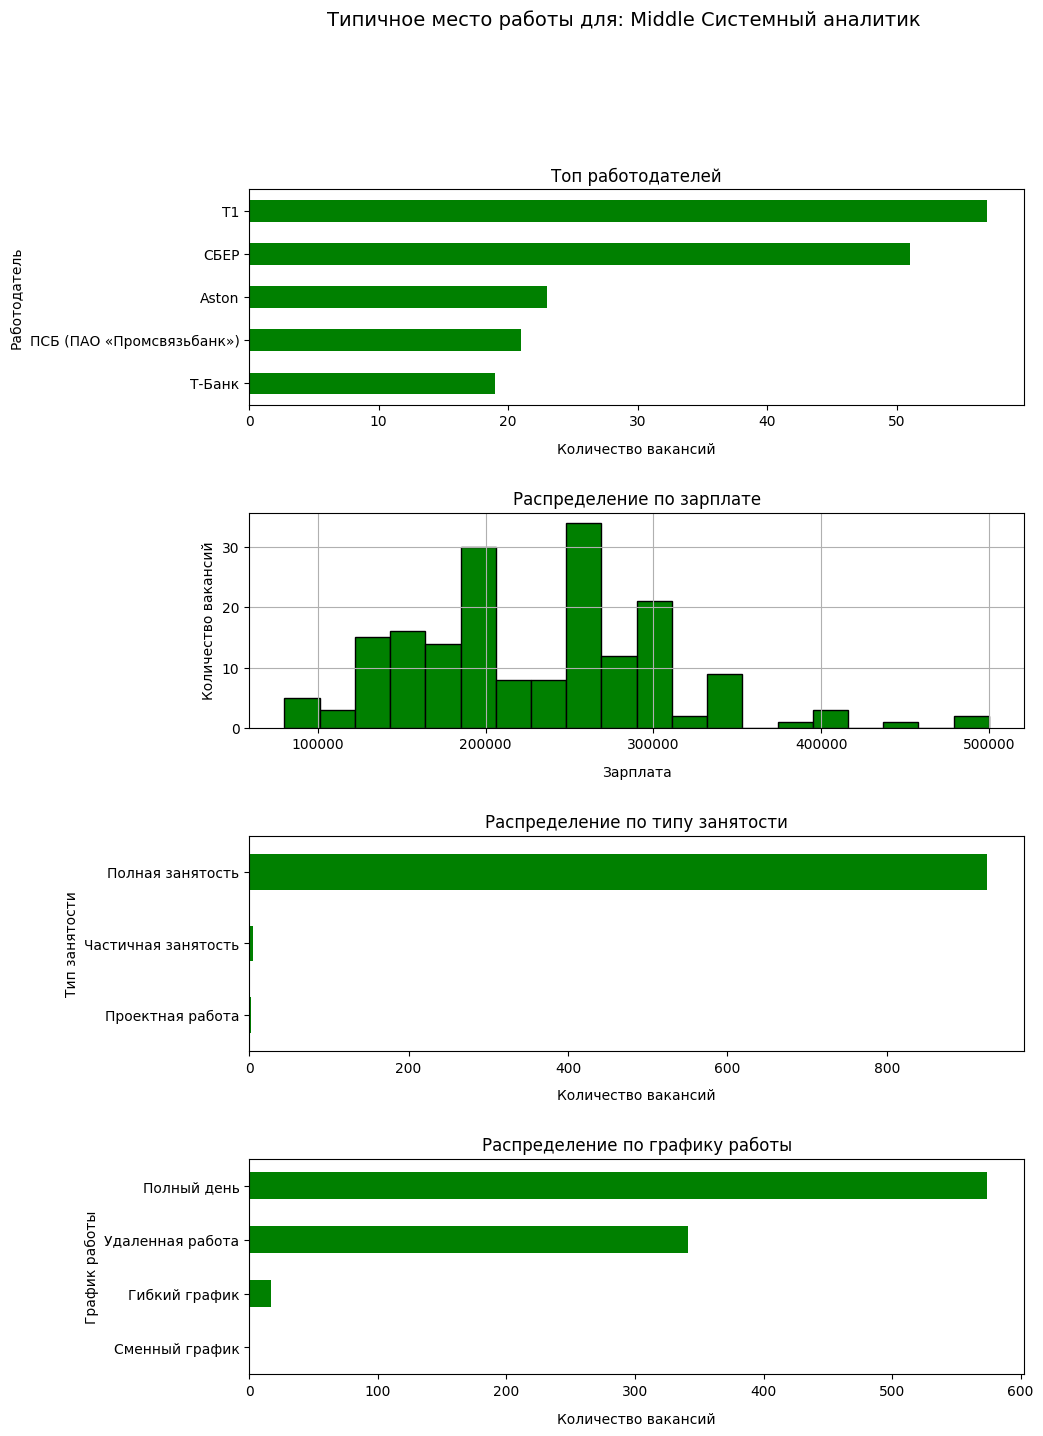

In [43]:
visualize('Системный аналитик', 'Middle')

**Типичное место работы для Middle Системный аналитик:**
1. Место работы - T1.
2. Заработная плата - 200-300 тыс.
3. Полная занаятость.
4. Полный рабочий день.

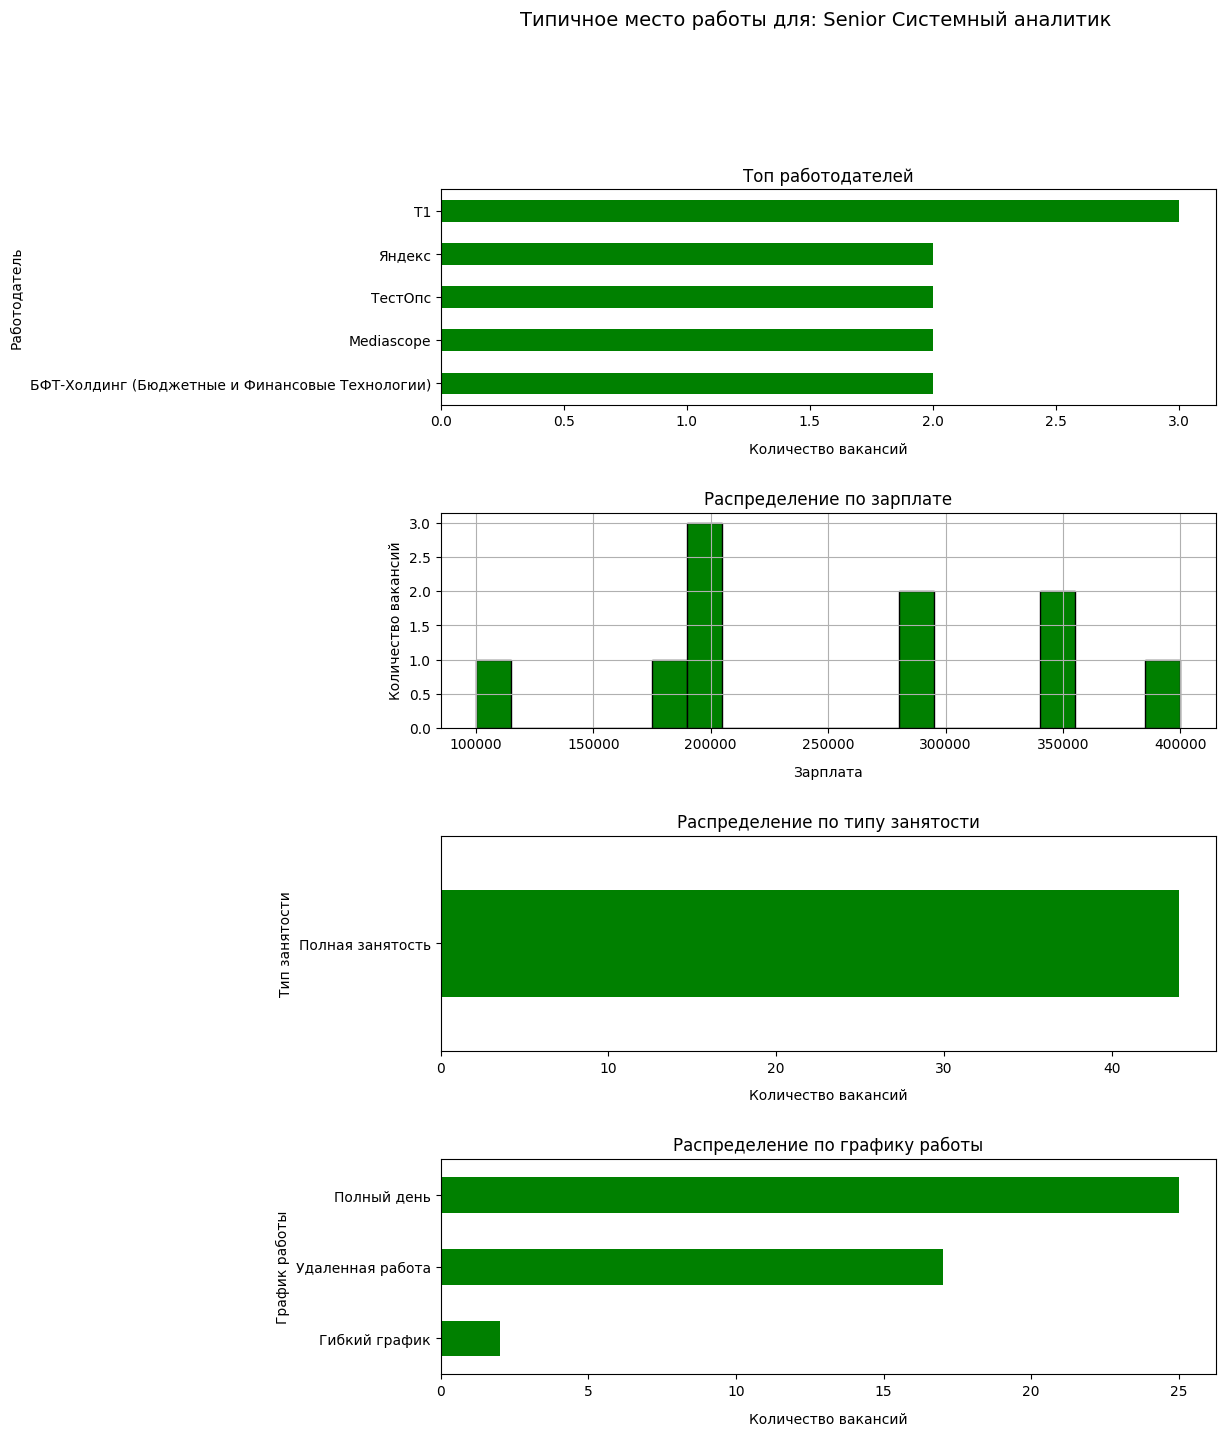

In [44]:
visualize('Системный аналитик', 'Senior')

**Типичное место работы для Senior Системный аналитик:**
1. Место работы - T1.
2. Заработная плата - 200-400тыс.
3. Полная занаятость.
4. Полный рабочий день.

## **3.4. Определение,  какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.**

Нам уже даны некоторые hard skills и soft skills

In [46]:
df['soft_skills_from_description'].value_counts()

,count
soft_skills_from_description,
Документация,1168
"Коммуникация, Документация",213
Коммуникация,175
Аналитическое мышление,148
"Документация, Аналитическое мышление",89
Проактивность,33
"Документация, Проактивность",29
"Документация, Переговоры",22
"Коммуникация, Документация, Аналитическое мышление",15


In [47]:
soft_skills = list(
    df['soft_skills_from_description']
    .dropna()  # Удаляем NaN
    .str.split(', ')  # Разделяем строки по запятой и пробелу
    .explode()  # Взрываем списки в отдельные строки
    .str.strip()  # Удаляем лишние пробелы
    .unique()  # Извлекаем уникальные значения
)
soft_skills

['Коммуникация',
 'Документация',
 'Проактивность',
 'Аналитическое мышление',
 'Креативность',
 'Адаптивность',
 'Решение проблем',
 'Презентация результатов',
 'Внимание к деталям',
 'Критическое мышление',
 'Эмпатия',
 'Переговоры',
 'Принятие решений',
 'Тайм-менеджмент',
 'Письменная коммуникация']

In [48]:
df['hard_skills_from_description'].value_counts()

,count
hard_skills_from_description,
confluence,636
Pandas,266
Юнит-экономика,39
"Pandas, confluence",30
"confluence, Юнит-экономика",9
"Pandas, Юнит-экономика",4
Google Sheets,2
"Pandas, Google Sheets",1
Математическая статистика,1


In [49]:
hard_skills = list(
    df['hard_skills_from_description']
    .dropna()  # Удаляем NaN
    .str.split(', ')  # Разделяем строки по запятой и пробелу
    .explode()  # Взрываем списки в отдельные строки
    .str.strip()  # Удаляем лишние пробелы
    .unique()  # Извлекаем уникальные значения
)
hard_skills

['Pandas',
 'Юнит-экономика',
 'confluence',
 'Google Sheets',
 'Математическая статистика']

Мы воспользуемся уже введенными slills и добавим словарь skills топовыми skills из столбца key_skills.

In [50]:
# Приведем значения в нужных полях к нижнему регистру, чтобы выявить некоторые неявные дубликаты
for column in ['key_skills', 'hard_skills_from_description', 'soft_skills_from_description']:
    df[column] = df[column].str.lower()

In [51]:
#Напишем функцию для словаря
def get_skill_cat_dict(column: pd.Series, skill_category: str) -> dict[str]:
    skills_dict = {}
    for skills in column:
        if not isinstance(skills, str):
            continue
        for skill in skills.split(', '):
            skills_dict[skill] = skill_category

    return skills_dict

In [52]:
# Получение словаря с хард-навыками
hard_skills = get_skill_cat_dict(df['hard_skills_from_description'], 'hard')
# Получение словаря с софт-навыками
soft_skills = get_skill_cat_dict(df['soft_skills_from_description'], 'soft')

In [53]:
# Преобразуем строчный тип данных в список
df['key_skills'] = df['key_skills'].apply(eval)

In [54]:
# Посчитаем топ самых распространенных навыков
total_skills_list = []
for skills in df['key_skills']:
    for skill in skills:
        total_skills_list.append(str(skill))
total_skills_counter = Counter(total_skills_list)
#total_skills_counter

In [55]:
pd.Series(total_skills_counter).sort_values(ascending=False).head(50)

,0
документация,1571
sql,1437
confluence,699
аналитическое мышление,658
bpmn,656
python,627
системный анализ,576
uml,574
анализ данных,487
коммуникация,461


In [56]:
# На основе полученных данных сделаем словарь с распределением навыков
top_skills = {
    'документация': 'soft',
    'sql': 'hard',
    'confluence': 'hard',
    'аналитическое мышление': 'soft',
    'bpmn': 'hard',
    'python': 'hard',
    'системный анализ': 'hard',
    'uml': 'hard',
    'анализ данных': 'hard',
    'коммуникация': 'soft',
    'rest': 'hard',
    'pandas': 'hard',
    'работа с базами данных': 'hard',
    'soap': 'hard',
    'аналитика': 'hard',
    'разработка технических заданий': 'hard',
    'работа с большим объемом информации': 'hard',
    'power bi': 'hard',
    'бизнес-анализ': 'hard',
    'ms excel': 'hard',
    'постановка задач разработчикам': 'soft',
    'базы данных': 'hard',
    'ms sql': 'hard',
    'xml': 'hard',
    'api': 'hard',
    'postgresql': 'hard',
    'atlassian jira': 'hard',
    'json': 'hard',
    'atlassian confluence': 'hard',
    'data analysis': 'hard',
    'сбор и анализ информации': 'hard',
    'аналитические исследования': 'hard',
    'json api': 'hard',
    'математическая статистика': 'hard',
    'проактивность': 'soft',
    'kafka': 'hard',
    'tableau': 'hard',
    'моделирование бизнес процессов': 'hard',
    'rest api': 'hard',
    'scrum': 'hard',
    'dwh': 'hard',
    'etl': 'hard',
    'английский язык': 'soft',
    'анализ бизнес показателей': 'hard',
    'оптимизация бизнес-процессов': 'hard',
    'статистический анализ': 'hard',
    'системная интеграция': 'hard',
    'ms powerpoint': 'hard',
    'техническая документация': 'hard',
    'agile': 'soft'
}

#oбъединим полученные результаты в один словарь
total_skills = top_skills | hard_skills | soft_skills
total_skills

{'документация': 'soft',
 'sql': 'hard',
 'confluence': 'hard',
 'аналитическое мышление': 'soft',
 'bpmn': 'hard',
 'python': 'hard',
 'системный анализ': 'hard',
 'uml': 'hard',
 'анализ данных': 'hard',
 'коммуникация': 'soft',
 'rest': 'hard',
 'pandas': 'hard',
 'работа с базами данных': 'hard',
 'soap': 'hard',
 'аналитика': 'hard',
 'разработка технических заданий': 'hard',
 'работа с большим объемом информации': 'hard',
 'power bi': 'hard',
 'бизнес-анализ': 'hard',
 'ms excel': 'hard',
 'постановка задач разработчикам': 'soft',
 'базы данных': 'hard',
 'ms sql': 'hard',
 'xml': 'hard',
 'api': 'hard',
 'postgresql': 'hard',
 'atlassian jira': 'hard',
 'json': 'hard',
 'atlassian confluence': 'hard',
 'data analysis': 'hard',
 'сбор и анализ информации': 'hard',
 'аналитические исследования': 'hard',
 'json api': 'hard',
 'математическая статистика': 'hard',
 'проактивность': 'soft',
 'kafka': 'hard',
 'tableau': 'hard',
 'моделирование бизнес процессов': 'hard',
 'rest api': '

In [57]:
# Создадим новые поля
def get_skills_series() -> pd.Series:
    hard_skills_total = []
    soft_skills_total = []
    for idx, row in df.iterrows():
        hard_skills = []
        soft_skills = []
        for i, column in enumerate(['key_skills', 'hard_skills_from_description', 'soft_skills_from_description']):
            # Проверка на np.nan
            if isinstance(row[column], float):
                continue
            if i != 0:
                row[column] = row[column].split(', ')
            for skill in row[column]:
                category = total_skills.get(skill)
                if category is None:
                    continue
                elif category == 'hard':
                     hard_skills.append(skill)
                else:
                    soft_skills.append(skill)
        if hard_skills:
            hard_skills_total.append(list(set(hard_skills)))
        else:
            hard_skills_total.append(np.nan)

        if soft_skills:
            soft_skills_total.append(list(set(soft_skills)))
        else:
            soft_skills_total.append(np.nan)

    return pd.Series(hard_skills_total), pd.Series(soft_skills_total)


df['hard_skills'], df['soft_skills'] = get_skills_series()
# Проверим работу функции
df[['hard_skills', 'soft_skills']].sample(10)

,hard_skills,soft_skills
2272,NaN,[аналитическое мышление]
2008,"[atlassian confluence, uml, бизнес-анализ, con...","[документация, аналитическое мышление, постано..."
1797,"[работа с большим объемом информации, ms excel...",[аналитическое мышление]
3460,"[базы данных, atlassian confluence, rest, kafk...",[аналитическое мышление]
1908,NaN,NaN
1271,"[работа с большим объемом информации, анализ б...",[аналитическое мышление]
429,NaN,[документация]
3478,[работа с большим объемом информации],"[документация, аналитическое мышление]"
1574,"[pandas, power bi]","[документация, аналитическое мышление]"
2791,"[rest, uml, sql]",[документация]


In [58]:
# Напишем функцию, которая посчитает количество навыков в списках
def get_skills_count(skills_list):
    """Функция считает количество навыков
    в списках навыков."""
    if isinstance(skills_list, float):
        return np.nan
    return len(skills_list)


df['hard_skills_count'] = df['hard_skills'].apply(get_skills_count)
df['soft_skills_count'] = df['soft_skills'].apply(get_skills_count)
# Проверка
df.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vac_type,grade,hard_skills,soft_skills,hard_skills_count,soft_skills_count
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"[power bi, субд, python, sql]",...,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN,Аналитик данных,Junior,"[python, power bi, sql]",NaN,3.0,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"[ms sql, работа с базами данных, ms excel]",...,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN,Аналитик данных,Junior,"[работа с базами данных, ms excel, ms sql]",NaN,3.0,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"[sql, power bi, субд, python, clickhouse, bpmn]",...,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN,Аналитик данных,Junior+,"[python, bpmn, power bi, sql]",NaN,4.0,NaN
3,100046788,Ведущий аналитик данных,2024-05-24 10:28:18,https://hh.ru/vacancy/100046788,Открытая,Х5 Group,"X5 GROUP, Центральный офис",Москва,Junior+ (1-3 years),"[анализ данных, коммуникация, sql, ms office, ...",...,ЗП не указана,"MS Office, SQL, Python, Hadoop, Нive, Аналитич...","pandas, юнит-экономика",коммуникация,Аналитик данных,Junior+,"[работа с большим объемом информации, python, ...",[коммуникация],8.0,1.0
4,100056244,Аналитик данных,2024-05-24 11:27:40,https://hh.ru/vacancy/100056244,Открытая,ЛУКОЙЛ,NaN,Москва,Middle (3-6 years),[документация],...,ЗП не указана,NaN,NaN,документация,Аналитик данных,Middle,NaN,[документация],NaN,1.0


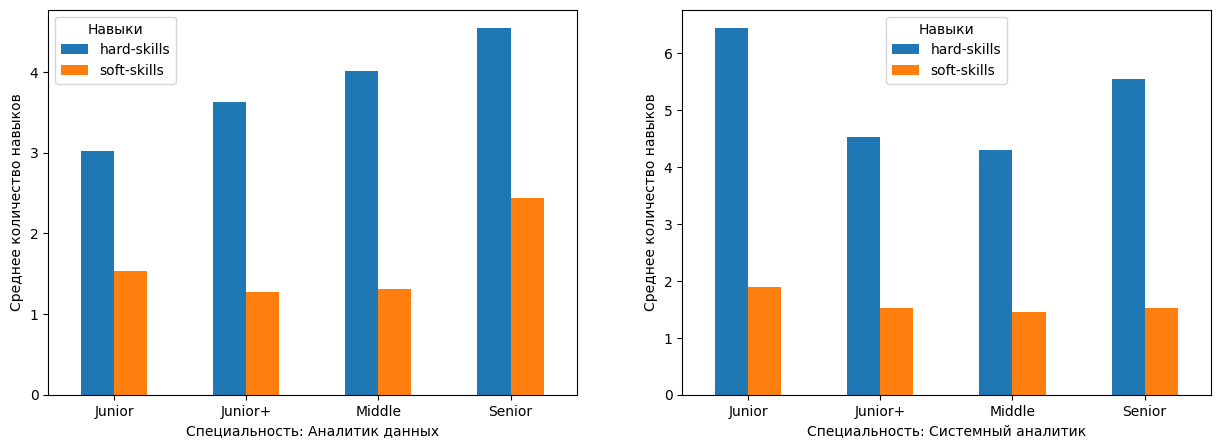

In [59]:
# Построим графики
plt.figure(figsize=(15, 5))
for i, job in enumerate(['Аналитик данных', 'Системный аналитик'], start=1):
    skills_count_per_job_type = df[df['vac_type'] == job].pivot_table(
        index='grade',
        columns='vac_type',
        values=['hard_skills_count', 'soft_skills_count'],
        aggfunc='mean',
    )
    ax = skills_count_per_job_type.plot(kind='bar',
                                        ax=plt.subplot(1, 2, i))

    ax.set_xlabel(f'Специальность: {job}')
    ax.set_ylabel(f'Cреднее количество навыков')
    ax.legend(['hard-skills', 'soft-skills'], title='Навыки')
    plt.xticks(rotation=0)

plt.show()

**Промежуточный вывовод по подразделу 3.4.:**

Чаще всего как у Аналитиков данных, так и у Системных аналитиков требуют hard skillls. Больше всего требований у Аналитиков данных предъявляют к Senior, менее требовательны к Junior. А у Системных аналитиков больше требований предьявляют к Junior, как hard так и soft skills. Вообще к Системным аналитикам предъявляется больше требований, чем к Аналитикам данных, 6 против 4.

## **3.5. Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Системный аналитик по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Отдельно для грейдов Junior, Junior+, Middle, Senior.**

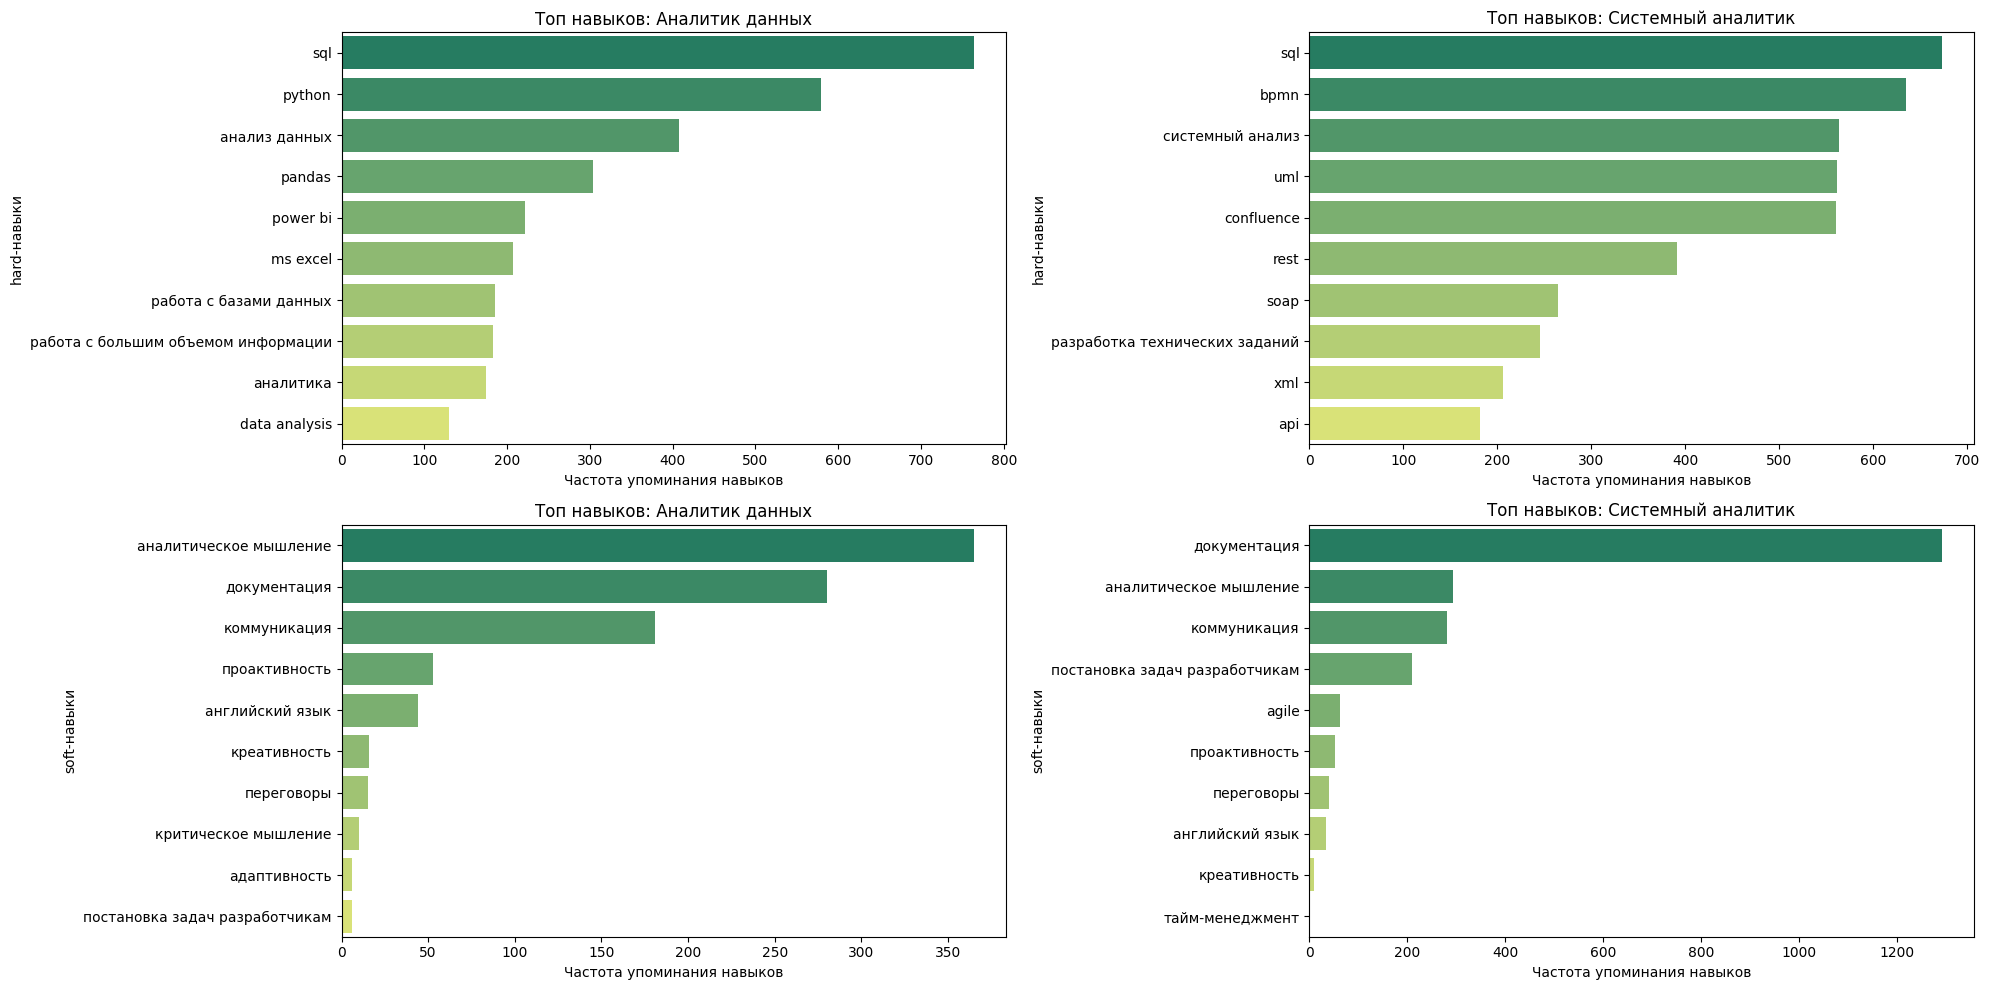

In [60]:
# Разобьем списки с навыками на отдельные строки в датафрейме
hard_skills_df = df.explode('hard_skills')
soft_skills_df = df.explode('soft_skills')

# Построим графики
plt.figure(figsize=(20, 10))
i = 1
for df, column in ((hard_skills_df, 'hard_skills'), (soft_skills_df, 'soft_skills')):
    for vac_type in ('Аналитик данных', 'Системный аналитик'):
        skills_pivot = (df[df['vac_type'] == vac_type].pivot_table(
            index=column,
            columns='vac_type',
            values='area',
            aggfunc='count'
        ).sort_values(by=vac_type, ascending=False))
        ax = sns.barplot(skills_pivot.head(10),
                         y=column,
                         x=vac_type,
                         orient='h',
                         ax=plt.subplot(2, 2, i),
                         palette='summer')
        ax.set_xlabel('Частота упоминания навыков')
        ax.set_title(f'Топ навыков: {vac_type}')
        if i > 2:
            ax.set_ylabel('soft-навыки')
        else:
            ax.set_ylabel('hard-навыки')

        i += 1
plt.tight_layout()
plt.show()

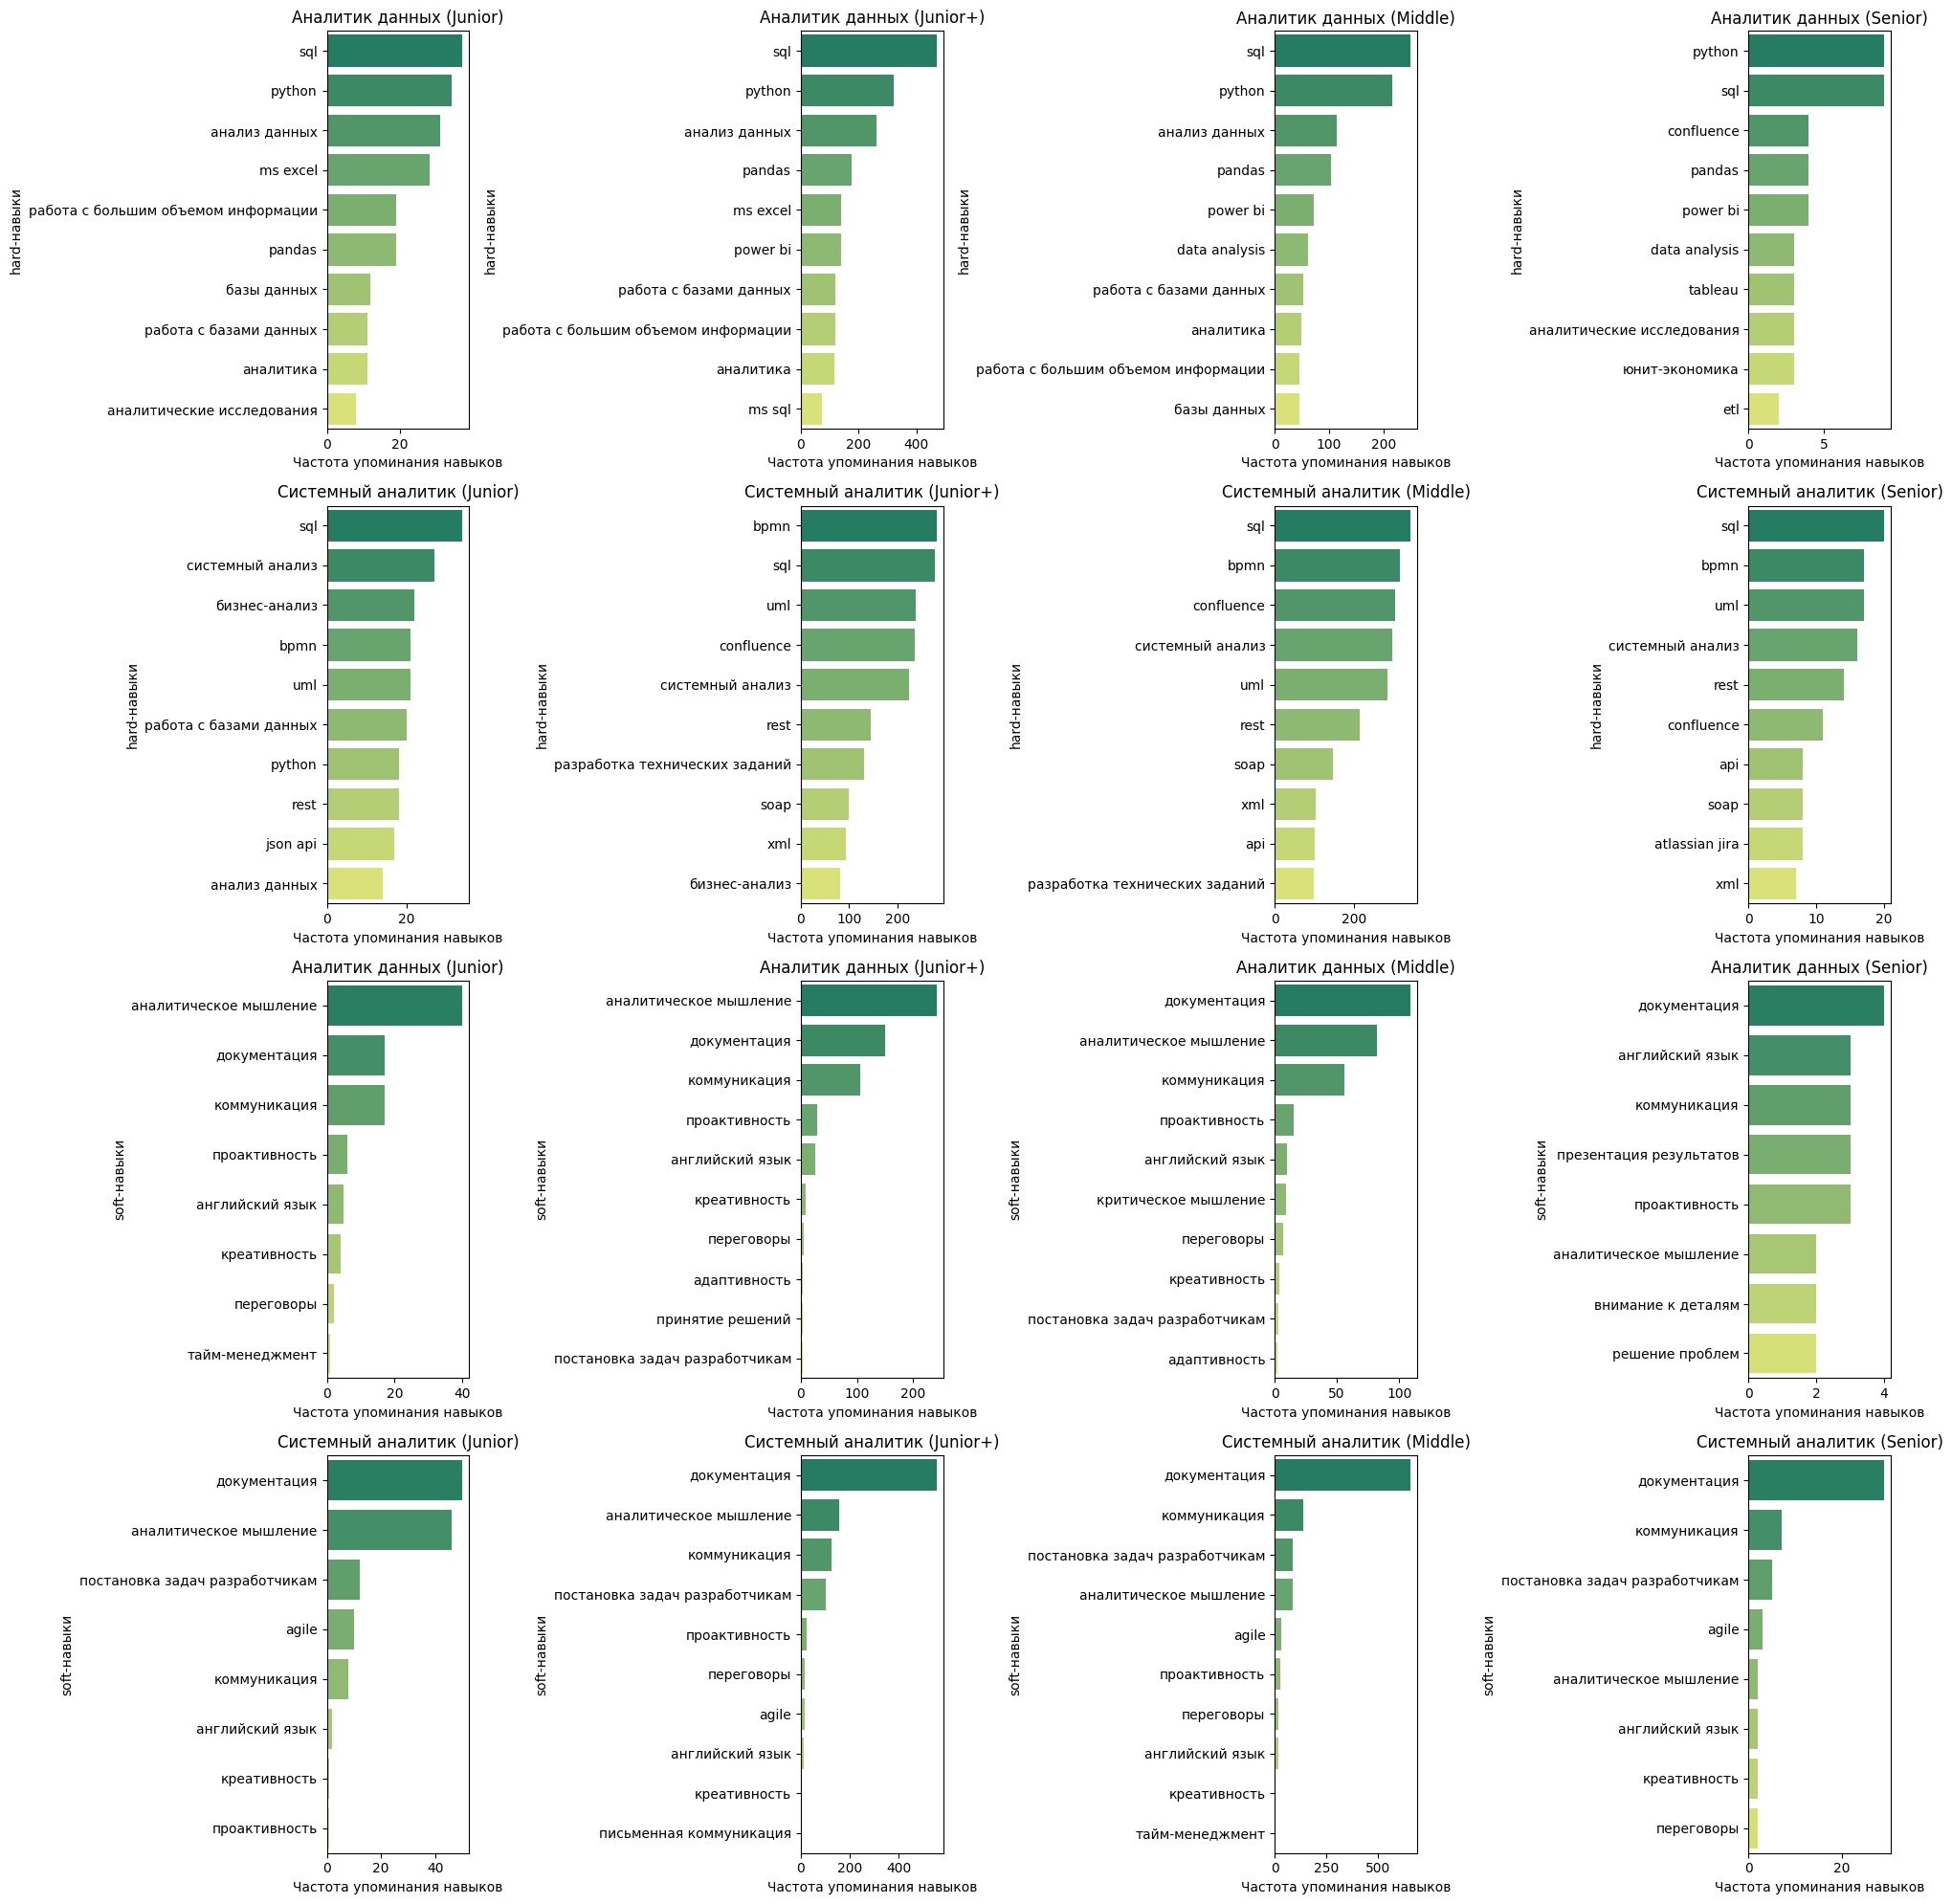

In [61]:
# Построение графиков
plt.figure(figsize=(20, 20))
i = 1
for df, column in ((hard_skills_df, 'hard_skills'), (soft_skills_df, 'soft_skills')):
    for vac_type in ('Аналитик данных', 'Системный аналитик'):
        for grade in ('Junior', 'Junior+', 'Middle', 'Senior'):
            # Фильтруем данные по типу вакансии и грейду
            filtered_df = df[(df['vac_type'] == vac_type) & (df['grade'] == grade)]
            if not filtered_df.empty:
                # Строим сводную таблицу
                skills_pivot = filtered_df.pivot_table(
                    index=column,
                    columns='vac_type',
                    values='grade',
                    aggfunc='count'
                ).sort_values(by=vac_type, ascending=False)
                # Строим график
                ax = sns.barplot(
                    data=skills_pivot.head(10),
                    y=skills_pivot.head(10).index,
                    x=vac_type,
                    orient='h',
                    ax=plt.subplot(4, 4, i),
                    palette='summer'
                )
                ax.set_xlabel('Частота упоминания навыков')
                ax.set_title(f'{vac_type} ({grade})')
                if i > 8:
                    ax.set_ylabel('soft-навыки')
                else:
                    ax.set_ylabel('hard-навыки')
                i += 1

plt.tight_layout()
plt.show()

**Промежуточный вывод по подразделу 3.5.:**

К топ hard skills Аналитиков данных относятся sql, phyton и, естественно, анализ данных. Топ soft skills занимают аналитическое мышление, документация и коммуникация.
А вот в топ hard skills Системных аналитиков относятся sql, bpmn, естественно, системный анализ, uml и confuence. При чем они требуютс почти во всех вакансиях одновременно. Топ soft skills занимают документация, аналитическое мышление и постановка задач разработчикам.



# **Выводы:**

**1. Общая информация о данных.**
Данные предоставлены в виде двух таблиц: информация по аналитикам данных и информация по системным аналитикам. Вакансий аналитиков данных представлено 1801 в промежутке времени с 13.02.2024 по 11.06.2024, а вакансий системных аналитиков - 1915 в промежутке времени с 27.06.2024 по 09.07.2024. Наименования столбцов в таблицах совпадают. Типы данных соответствуют содержимому. В обоих таблицах присутствуют пропуски в одних и тех же столбцах, но в разном количестве: key_skills_from_key_skills_field, soft_skills_from_description, hard_skills_from_description, department, salary_from, salary_to.
Следует обратить внимание на минимальные значения salary_from по анализируемым вакансиям. Для облегчения анализ данных следует объединить данные в одну таблицу.


**2. В результате предобработки данных:**
- Были исправлены опечатки минимальных значений в salary_from.
- Явных и неявных дубликатов не обнаружено.
- Частично заполнены пропуски в salary_from. Количество непустых строк увеличилось с 704 до 858. Вообще работадатели неохотно заявляют о заработной плате. Скорее всего она зависит от hard и soft навыков соискателя и имеет индивидуальный характер.
- Пропуски в столбцах key_skills_from_key_skills_field, soft_skills_from_description, hard_skills_from_description оставлены без заполнения. Данные в эти столбцы переносятся из столбца key_skills.
- Пропуски в столбце department оставлены без изменения, т.к. они не имеют ценности для анализа.

**3. Исследовательский анализ данных.**

Больше всего востребованы Junior+ Аналитики данных и Middle Системные администраторы. Менее востребоаны Senior Аналитиков данных и Системных аналитиков.

Самую большую долю грейдов у Аналитиков данных 61% занимает Junior+, далее 31% - Middle, Junior - 8%, а на долю Senior приходится 1%. У Системных аналитиков львиную долю занимают Viddle - 49%, немного уступают Junior+ -44%, Junior - 4%, а Senior -2%.

**Типичное место работы для Junior Аналитика данных:**
1. Место работы - СБЕР.
2. Заработная плата - 55-60тыс.
3. Полна занаятость.
4. Полный рабочий день

**Типичное место работы для Junior+ Аналитика данных:**
1. Место работы - СБЕР.
2. Заработная плата - 60-110тыс.
3. Полная занаятость.
4. Полный рабочий день.

**Типичное место работы для Middle Аналитика данных:**
1. Место работы - СБЕР.
2. Заработная плата - 110-200тыс.
3. Полная занаятость.
4. Полный рабочий день.

**Типичное место работы для Senior Аналитика данных:**
1. Место работы - Леруа Мерлен.
2. Заработная плата - 180-200тыс.
3. Полная занаятость.
4. Полный рабочий день.

**Типичное место работы для Junior Системный аналитик:**
1. Место работы - Aston.
2. Заработная плата - 55-70тыс.
3. Полная занаятость.
4. Полный рабочий день.

**Типичное место работы для Junior+ Системный аналитик:**
1. Место работы - СБЕР.
2. Заработная плата - 70-200 тыс.
3. Полная занаятость.
4. Полный рабочий день.

**Типичное место работы для Middle Системный аналитик:**
1. Место работы - T1.
2. Заработная плата - 200-300 тыс.
3. Полная занаятость.
4. Полный рабочий день.

**Типичное место работы для Senior Системный аналитик:**
1. Место работы - T1.
2. Заработная плата - 200-400тыс.
3. Полная занаятость.
4. Полный рабочий день.

Чаще всего как у Аналитиков данных, так и у Системных аналитиков требуют hard skillls. Больше всего требований у Аналитиков данных предъявляют к Senior, менее требовательны к Junior. А у Системных аналитиков больше требований предьявляют к Junior, как hard так и soft skills. Вообще к Системным аналитикам предъявляется больше требований, чем к Аналитикам данных, 6 против 4.

К топ hard skills Аналитиков данных относятся sql, phyton и, естественно, анализ данных. Топ soft skills занимают аналитическое мышление, документация и коммуникация.
А вот в топ hard skills Системных аналитиков относятся sql, bpmn, естественно, системный анализ, uml и confuence. При чем они требуютс почти во всех вакансиях одновременно. Топ soft skills занимают документация, аналитическое мышление и постановка задач разработчикам.




